In [50]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats as sps
import seaborn as sns
sns.set(style='ticks', font_scale=1.3)

import scipy.optimize

rcParams['figure.figsize'] = 10, 5

from typing import *

In [4]:
import logging

logger = logging.getLogger(__name__)
loglevel = "DEBUG"
logger.setLevel(loglevel)
handler = logging.StreamHandler()
handler.setLevel(loglevel)
format = '%(levelname)s: %(message)s'
handler.setFormatter(logging.Formatter(format))
logger.addHandler(handler)

## Task 2: Gradient descent

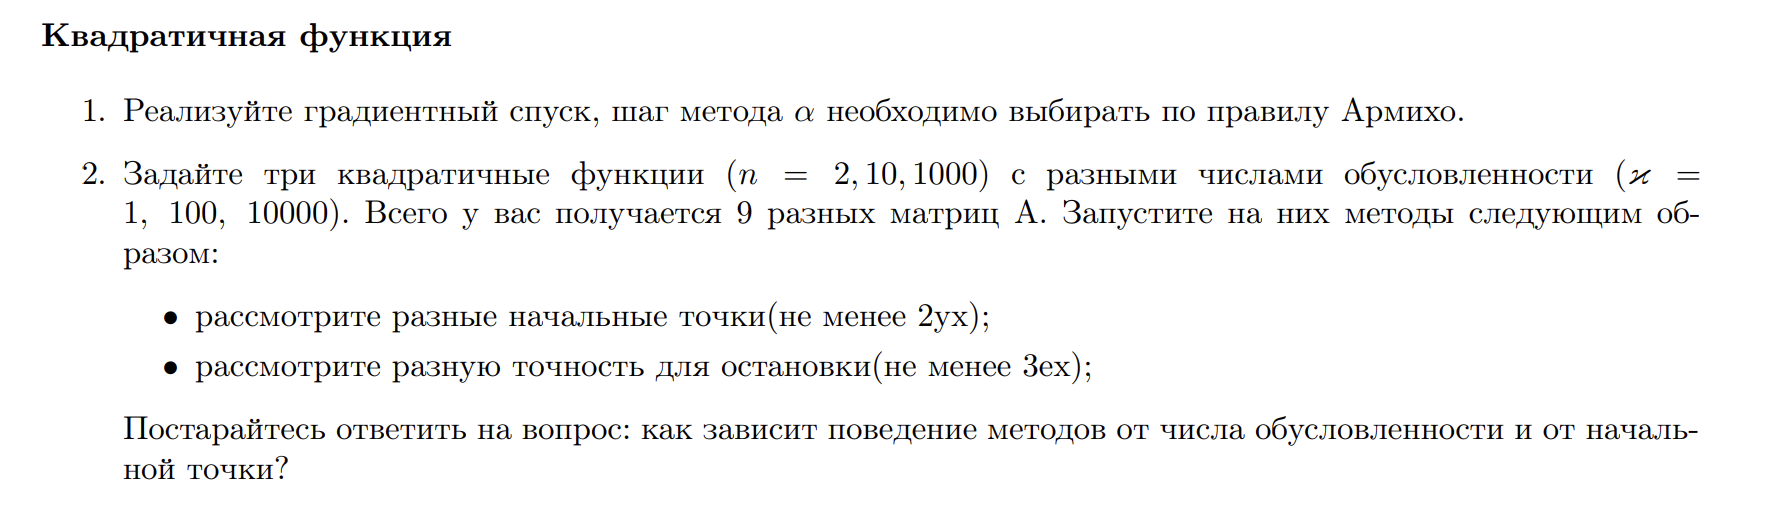

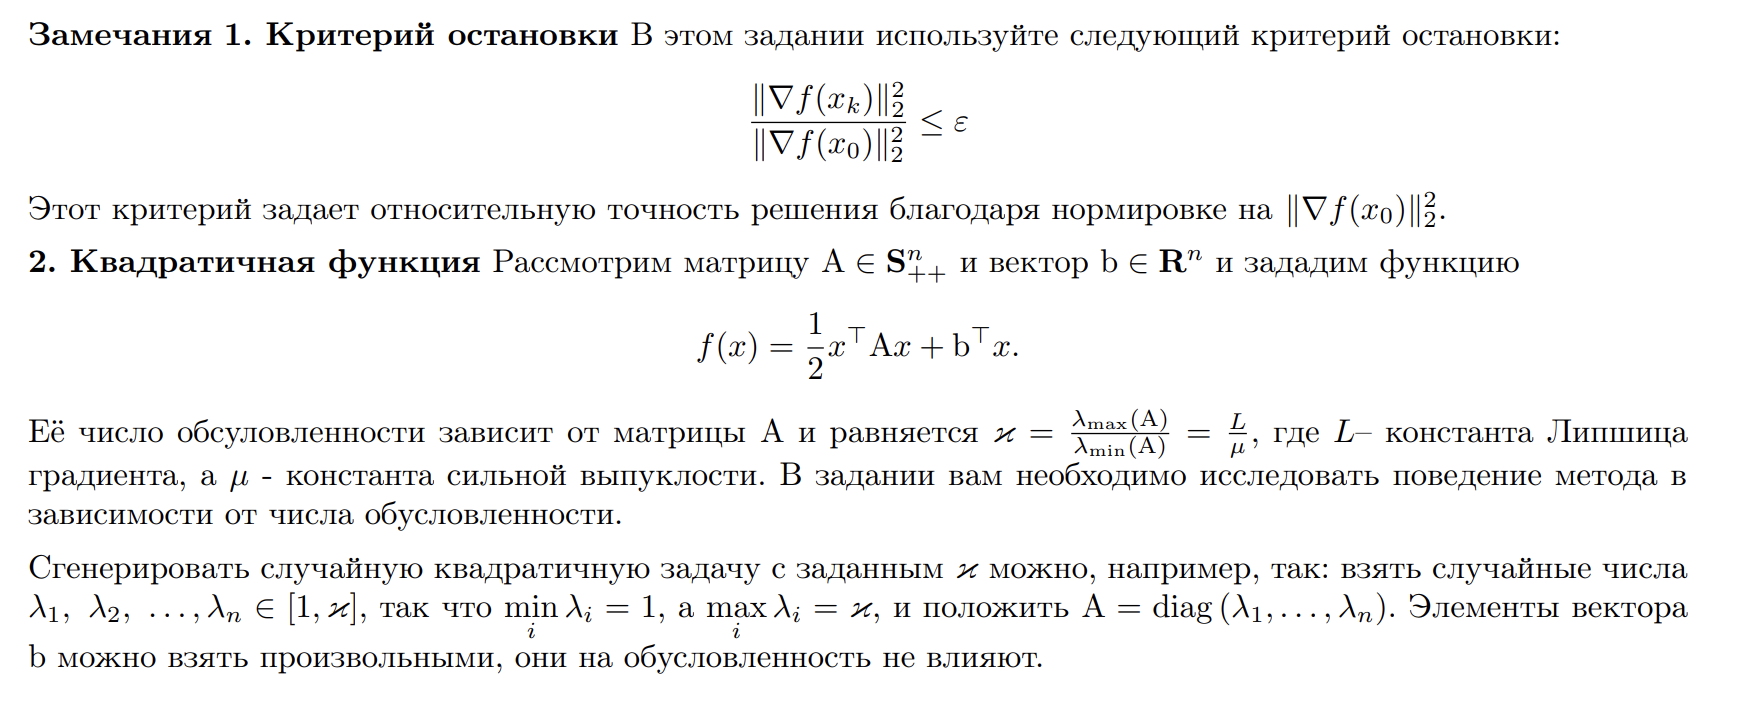

### Functions

In [28]:
def is_pos_def(M):
    """Check if matrix if positive definite"""
    return np.all(np.linalg.eigvals(M) > 0)

In [29]:
def is_pos_def(M):
    """Check if matrix if positive definite"""
    return np.all(np.linalg.eigvals(M) > 0)

def f(x, A, b):
    """Quadratic function f(x)"""
    func = (1/2) * (x.T @ A @ x) + (b.T @ x)
    return func
    
def grad_f(x, A, b):
    """Gradient of quadratic function f(x)"""
    grad = (A @ x) + b
    return grad
    
# def gessian_f(x, A, b):
#     """Gessian of quadratic function f(x)"""
#     return A

In [271]:
# n = 100
# cond_num = 100

# lambdas = sps.uniform(loc=1, scale=1+cond_num).rvs(size=n)
# lambdas[np.argmin(lambdas)] = 1
# lambdas[np.argmax(lambdas)] = cond_num

# A = np.diagflat(lambdas)
# b = np.random.rand(n)

# assert is_pos_def(A), "Matrix is not positive definite"

In [272]:
# N = int(1e3)
# alpha = 0.01
# eps = 0.00001

# x = np.zeros((N, n))
# f_vals = np.zeros(N)
# x[0] = np.random.rand(n)
# f_vals[0] = f(x[0], A, b)

# norm_0 = np.linalg.norm(grad_f(x[0], A, b))**2

# for k in range(N-1):
#     grad = grad_f(x[k], A, b)
#     x[k+1] = x[k] - alpha * grad
    
    
#     f_vals[k] = f(x[k], A, b)
#     norm_k = np.linalg.norm(grad_f(x[k], A, b))**2
#     stop_criteria = (norm_k / norm_0) <= eps
    
#     if stop_criteria:
#         end_iteration = k
#         print(f'GD converge at {k} iteration')
#         break


# if not stop_criteria:
#     print(f'GD didnt converge, may be need to increase N value')

In [322]:
def draw_convergence_plot(f_vals, N_iterations, label=None):
    
    plt.plot(np.arange(N_iterations), f_vals[:N_iterations], lw=3, label=label)

    plt.ylabel("Function value")
    plt.xlabel("Number of iteration")
    plt.legend()
    plt.grid()

In [265]:
def draw_alpha_plot(alphas, N_iterations):
    
    plt.plot(np.arange(N_iterations), alphas[:N_iterations], lw=3)

    plt.ylabel("Step alpha")
    plt.xlabel("Number of iteration")
    plt.grid()

In [452]:
def gradient_descent(n, N, alpha, eps, A, b, x0=None, verbose=False):
    """
    
    :param n: size of x
    :param N: maximim number of iterations
    :param alpha: initial gradient step
    :param eps: tolerance
    :param A: constant matrix from function f(x)
    :param b: constant vector from function f(x)
    :param x0: initial guess of x
    :return:
    """
    if verbose:
        logger.setLevel("DEBUG")
    else:
        logger.setLevel("INFO")
    
    if x0 is None:
        # x0 = (np.random.rand(n) + 10) * 5
        x0 = np.random.rand(n)
    
    x = np.zeros((N, n))
    x[0] = x0
    f_vals = np.zeros(N)
    f_vals[0] = f(x[0], A, b)
    alphas = np.zeros(N)

    norm_0 = np.linalg.norm(grad_f(x[0], A, b))
    
    end_iteration = N
    
    for k in range(N-1):
        # GD step 
        h_k = grad_f(x[k], A, b)
        
        # Armijo rule
        if f(x[k] - alpha * h_k, A, b) > f(x[k], A, b) + 0.2 * alpha * (h_k @ h_k):
            alpha_new = alpha * 0.5
            logger.debug(f"Armijo condition is not true, change alpha from {alpha:.6f} to {alpha_new:.6f}")
            alpha = alpha_new
        
        alphas[k] = alpha
        
        x[k+1] = x[k] - alpha * h_k
                
        f_vals[k] = f(x[k], A, b)
        f_vals[k+1] = f(x[k+1], A, b)
        
        norm_k = np.linalg.norm(grad_f(x[k+1], A, b))
        stop_criteria = ((norm_k**2) / (norm_0**2)) <= eps
        
        if stop_criteria:
            end_iteration = k+1
            logger.info(f'GD converge at {k+1} iteration, min f(x) = {f_vals[k+1]}')
            logger.debug(f'x_min = {x[k+1]}')
            break


    if not stop_criteria:
        logger.info(f'(!) GD didnt converge, may be need to increase number of iterations N')
        logger.debug(f'last f(x) = {f_vals[k+1]} at x = {x[k+1]}')
        logger.debug(f"current epsilon = {(norm_k**2 / norm_0**2)}")
        
        
    return f_vals, x, end_iteration, alphas

### Single experiment

In [206]:
n = 2
cond_num = 100

lambdas = sps.uniform(loc=1, scale=1+cond_num).rvs(size=n)
lambdas[np.argmin(lambdas)] = 1
lambdas[np.argmax(lambdas)] = cond_num

A = np.diagflat(lambdas)
b = np.random.rand(n)

assert is_pos_def(A), "Matrix is not positive definite"

In [212]:
N = int(1e5)
alpha = 2
eps = 1e-15
x0 = np.random.rand(n)*5 + 10

f_vals, x, N_iterations, alphas = gradient_descent(n, N, alpha, eps, A, b, x0, verbose=True)

DEBUG: Armijo condition is not true, change alpha from 2.000000 to 1.000000
DEBUG: Armijo condition is not true, change alpha from 1.000000 to 0.500000
DEBUG: Armijo condition is not true, change alpha from 0.500000 to 0.250000
DEBUG: Armijo condition is not true, change alpha from 0.250000 to 0.125000
DEBUG: Armijo condition is not true, change alpha from 0.125000 to 0.062500
DEBUG: Armijo condition is not true, change alpha from 0.062500 to 0.031250
DEBUG: Armijo condition is not true, change alpha from 0.031250 to 0.015625
INFO: GD converge at 65 iteration, min f(x) = -0.26166656459959486
DEBUG: x_min = [-6.01757463e-04 -7.23392674e-01]


In [213]:
scipy.optimize.minimize(f, x0, args=(A, b))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.2616665646056912
        x: [-6.014e-04 -7.234e-01]
      nit: 3
      jac: [-4.098e-07  2.235e-07]
 hess_inv: [[ 1.000e-02 -2.211e-06]
            [-2.211e-06  1.000e+00]]
     nfev: 15
     njev: 5

In [214]:
alpha

2

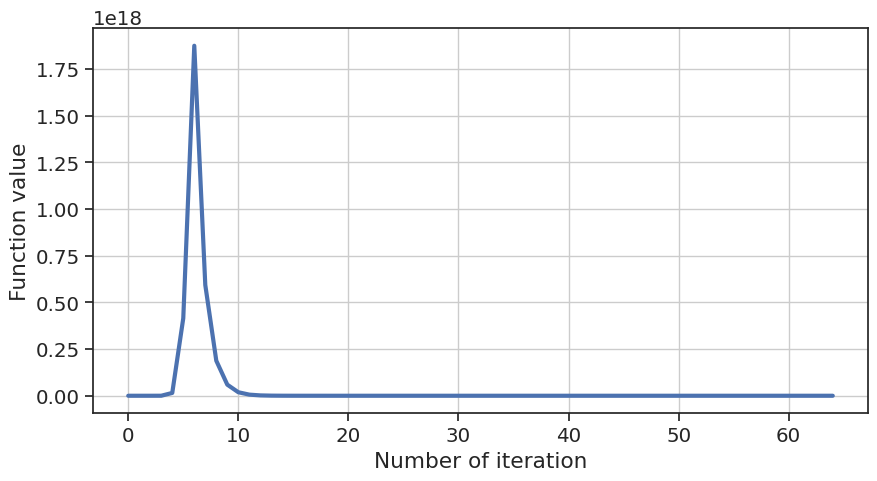

In [215]:
draw_convergence_plot(f_vals, N_iterations)

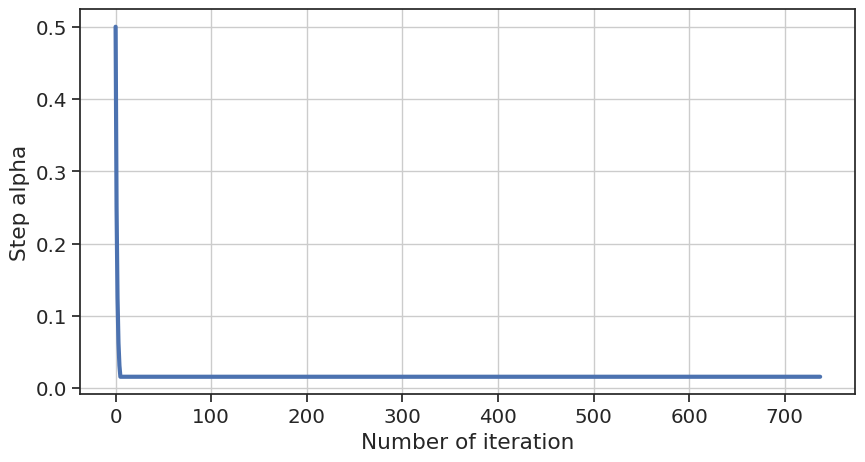

In [211]:
draw_alpha_plot(alphas, N_iterations)

### Multiple experiments

INFO: n = 2, condition number = 1
INFO: GD converge at 1 iteration, min f(x) = -0.016484033624434104
INFO: scipy ans = -0.01648403362443407


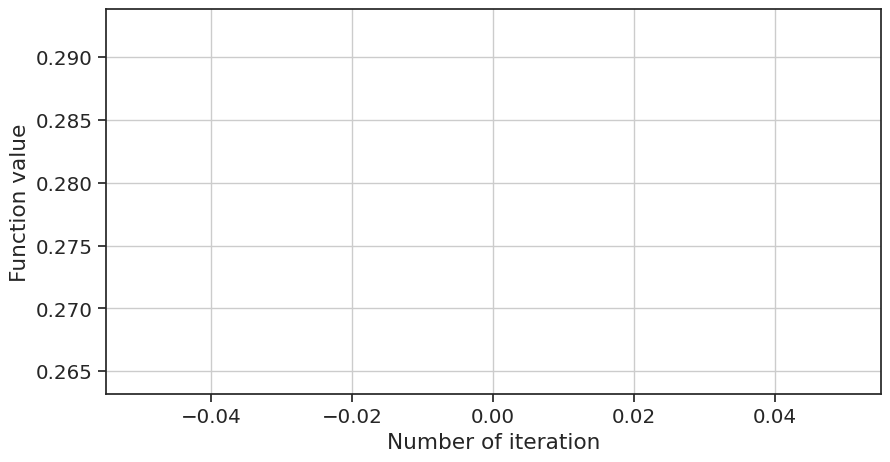

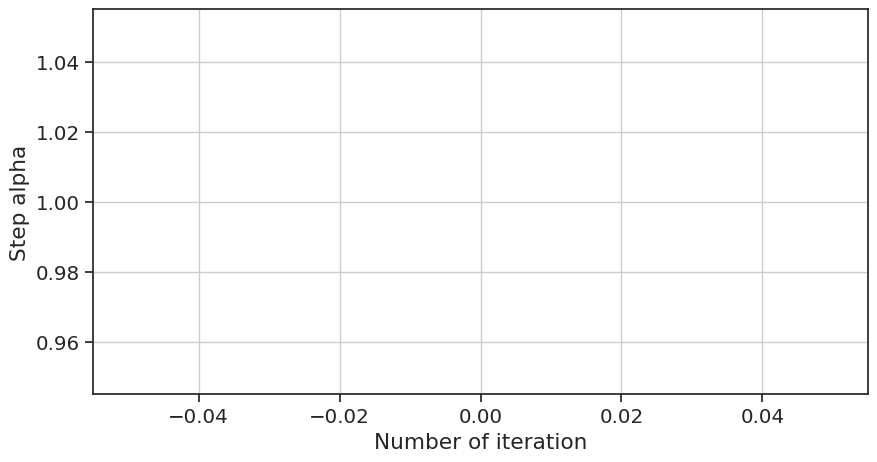

INFO: n = 2, condition number = 100
INFO: GD converge at 361 iteration, min f(x) = -0.0013594385080353923
INFO: scipy ans = -0.0013594494627152437


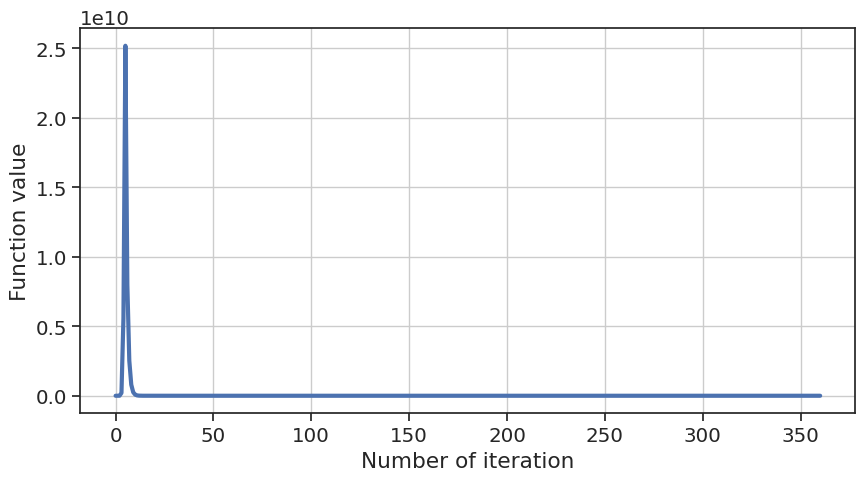

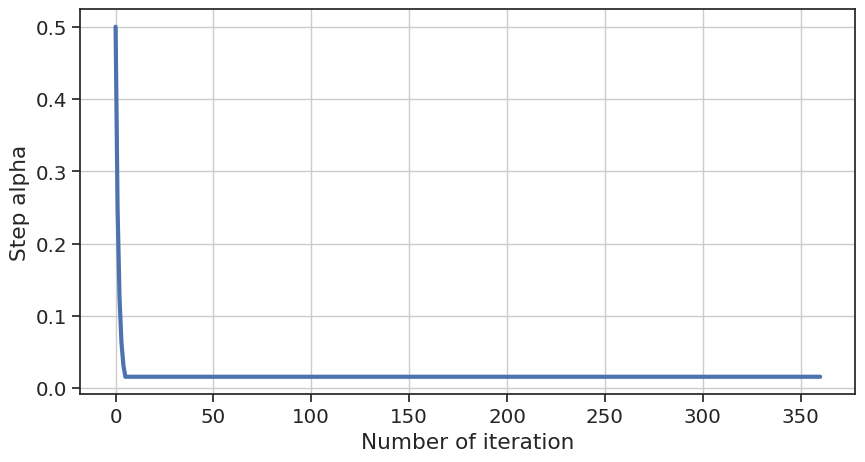

INFO: n = 2, condition number = 1000
INFO: GD converge at 2042 iteration, min f(x) = -0.25945060316752394
INFO: scipy ans = -0.25948263369442937


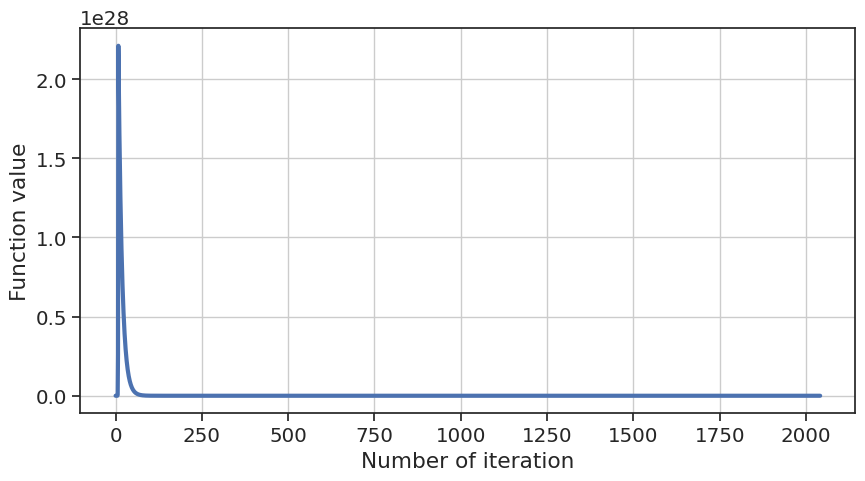

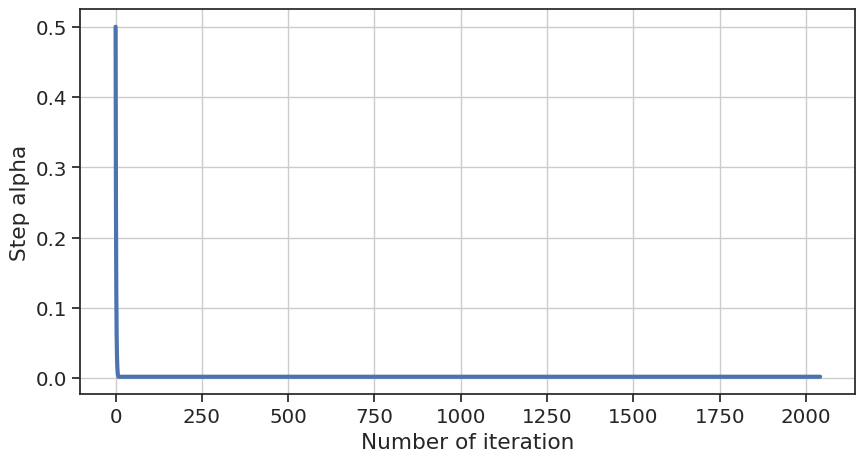

INFO: n = 10, condition number = 1
INFO: GD converge at 16 iteration, min f(x) = -0.60691620481907
INFO: scipy ans = -0.6069162052101829


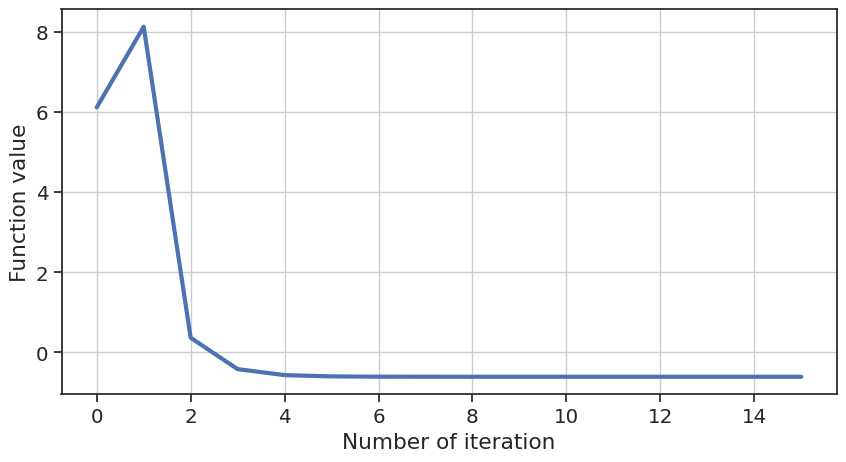

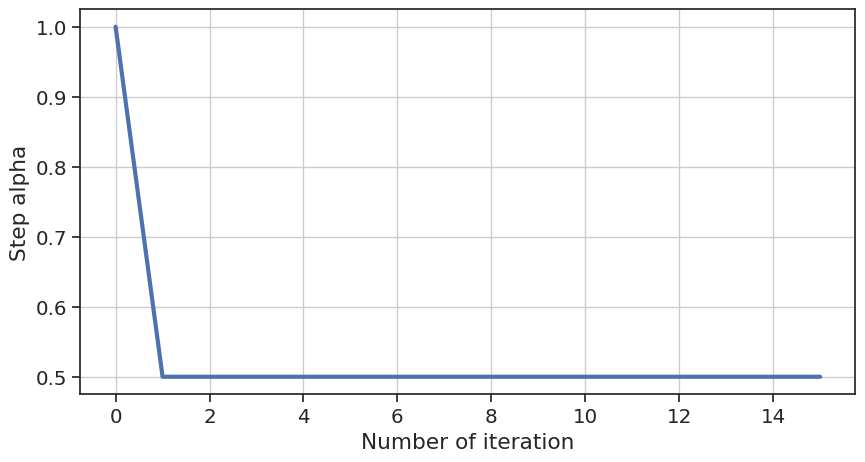

INFO: n = 10, condition number = 100
INFO: GD converge at 397 iteration, min f(x) = -0.5076628355967991
INFO: scipy ans = -0.5076632835837162


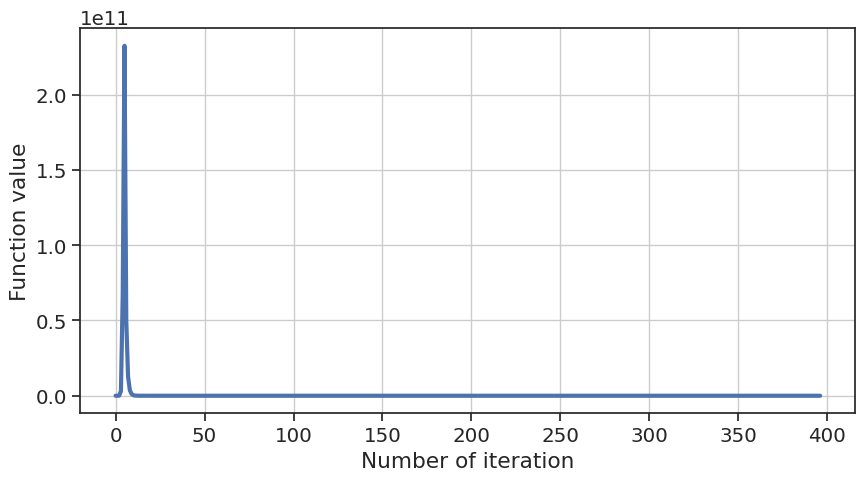

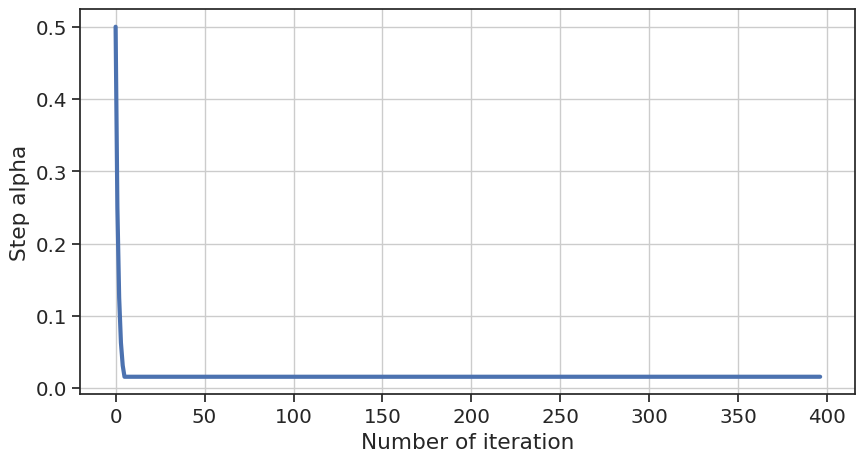

INFO: n = 10, condition number = 1000
INFO: GD converge at 2423 iteration, min f(x) = -0.3741470617425089
INFO: scipy ans = -0.3741549039138319


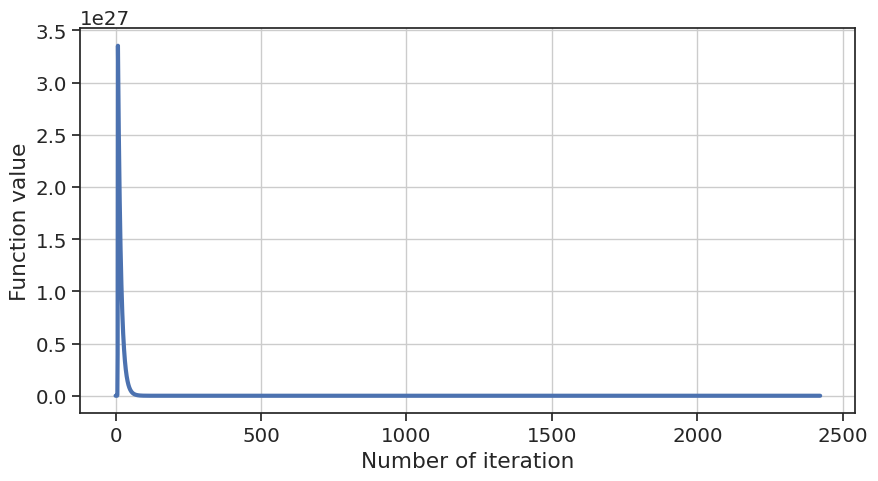

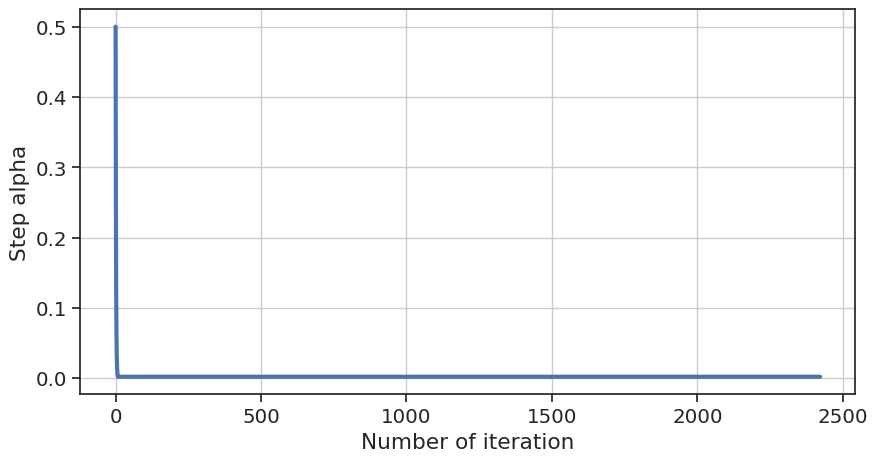

INFO: n = 1000, condition number = 1
INFO: GD converge at 17 iteration, min f(x) = -93.77715274646742
INFO: scipy ans = -93.77715275592443


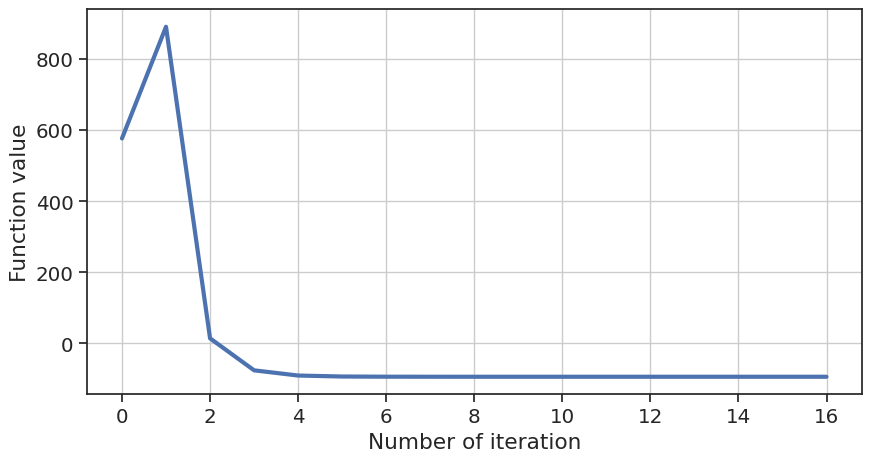

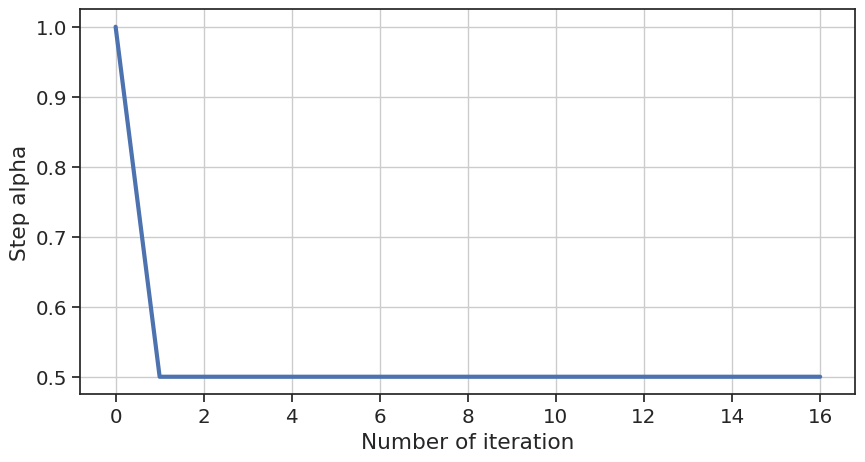

INFO: n = 1000, condition number = 100
INFO: GD converge at 207 iteration, min f(x) = -6.5327631656677765
INFO: scipy ans = -6.53281255541298


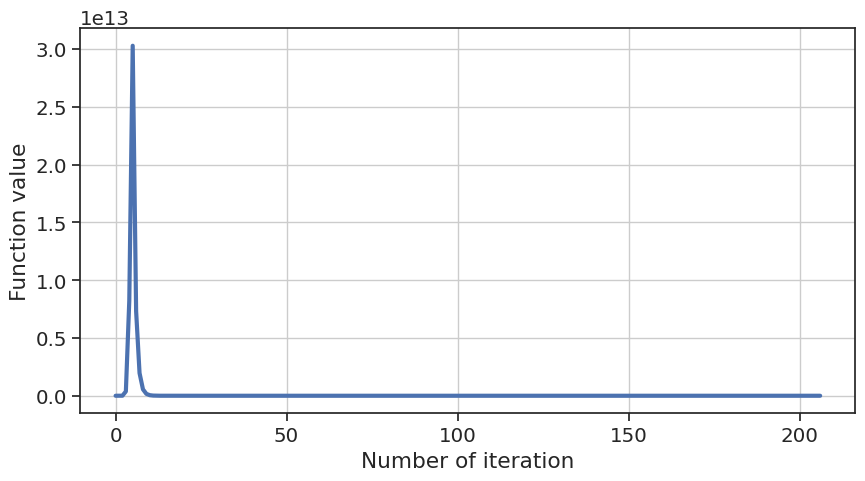

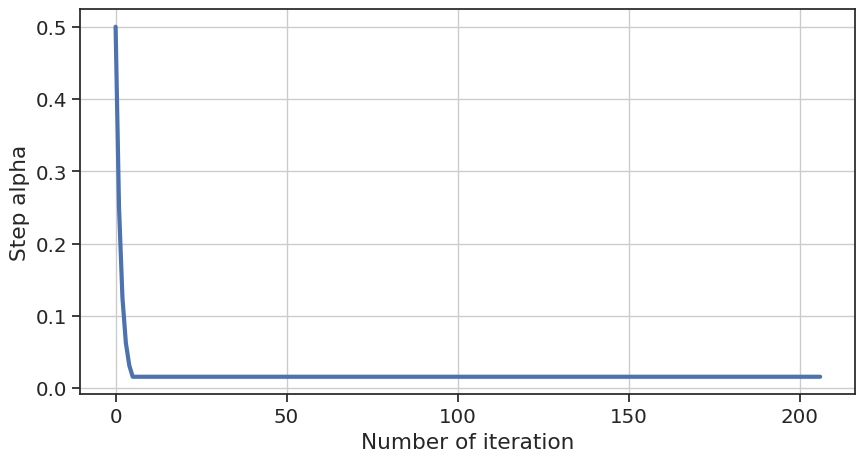

INFO: n = 1000, condition number = 1000
INFO: GD converge at 844 iteration, min f(x) = -0.9917666452660149


KeyboardInterrupt: 

In [217]:
N = int(1e4)
eps = 1e-10

n_list = [2, 10, 1000]
cond_num_list = [1, 100, 1000]


for n in n_list:
    for cond_num in cond_num_list:
        alpha = 1
        logger.info(f"n = {n}, condition number = {cond_num}")
        # print("------------------------------------")
        
        lambdas = sps.uniform(loc=1, scale=1+cond_num).rvs(size=n)
        lambdas[np.argmin(lambdas)] = 1; lambdas[np.argmax(lambdas)] = cond_num
        A = np.diagflat(lambdas)
        b = np.random.rand(n)
        assert is_pos_def(A), "Matrix is not positive definite"
        
        x0 = np.random.rand(n)
        f_vals, x, end_iteration, alphas = gradient_descent(n, N, alpha, eps, A, b, x0=x0, verbose=False)
        
        # print(f"\n----------- scipy ans = {scipy.optimize.minimize(f, x0, args=(A, b))['fun']} --------------\n")
        # print(f"\n----------- scipy ans = {scipy.optimize.minimize(f, x0, args=(A, b))['fun']} --------------\n")
        logger.info(f"scipy ans = {scipy.optimize.minimize(f, x0, args=(A, b))['fun']}")
        
        
        draw_convergence_plot(f_vals, end_iteration)
        draw_alpha_plot(alphas, end_iteration)
        plt.show()

**Вывод:**


Если в правиле Армихо делать `if`, а не `while` шаг может недостаточно уменьшиться за 1 итерацию и функция шагнет по направлению возрастания а не убывания, так может произойти переполнение и будет ошибки вычислений

## Task 3: Rosenbrock function

Функция Розенброка:
$$ f(x_1, x_2) = 100 (x_2 - x_1^2)^2 + (1 - x_1)^2 $$

$$ x^0 = (1.2, ~ 1.2), ~ x^0 = (-1.2, ~ 1) $$

1. Аналитически найдите точку минимума.
2. Исследуйте зависимость сходимости градиентного спуска от начального приближения, шаг метода выбирать по правилу Армихо. Необходимо рассмотреть как минимум 2 разные начальные точки $x_0$ и и 3 разные точности $\varepsilon$.
3. Постройте график зависимости длины шага от итерации для каждой начальной точки. Какой вывод Вы можете сделать?



---

Функция Розенброка:
$$ f(x_1, x_2) = 100 (x_2 - x_1^2)^2 + (1 - x_1)^2 $$

Найдем точку минимума:
$$ \frac{\partial f}{\partial x_1} = - 400 x_1 (x_2 - x_1^2) + 2(x_1 - 1)  = 0 \quad \quad (1)
$$
$$ \frac{\partial f}{\partial x_2} = 200 (x_2 - x_1^2) = 0 \quad \quad (2) $$

$$ (2) \Rightarrow (x_2 - x_1^2) = 0 \rightarrow (1) \rightarrow x_1 - 1 = 0$$

$$x_1 = 1 \rightarrow (1) \Rightarrow x_2 = 1$$

**Минимум функции**:
$$ (x_1^*, x_2^*) = (1, 1); \quad f(x_1^*, x_2^*) = 0 $$


---

In [218]:
def f(x, A, b):
    """Rosenbrock function"""
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

def grad_f(x, A, b):
    """Gradient of Rosenbrock function f(x1, x2)"""
    x1, x2 = x
    grad_x = -400 * x1 * (x2 - x1**2) + 2 * (x1 - 1)
    grad_y = 200 * (x2 - x1**2)
    
    return np.array([grad_x, grad_y])


In [236]:
n = 2
N = int(1e6)
alpha = 0.015
eps = 1e-15
# x0 = np.random.rand(n)
# x0 = np.array([0.001, 0.002]) * 10000
x0 = np.array([1.2, 1.2])


f_vals, x, N_iterations, alphas = gradient_descent(n, N, alpha, eps, A, b, x0, verbose=True)


# f_vals, x, end_iteration, alphas
# gradient_descent(n, N, alpha, eps, A, b, x0=None, verbose=True):

DEBUG: Armijo condition is not true, change alpha from 0.015000 to 0.007500
DEBUG: Armijo condition is not true, change alpha from 0.007500 to 0.003750
DEBUG: Armijo condition is not true, change alpha from 0.003750 to 0.001875
INFO: GD converge at 14467 iteration, min f(x) = 1.959637085728167e-11
DEBUG: x_min = [0.99999558 0.99999114]


чем дальше начальное приближение от истинного минимума, тем больше начальное значение функции и слабее отличия норм градиентов при расчете `eps`

Поэтому надо выкручивать `eps` практически в 0, это поможет в задачах с плохим начальным приближением (может понадобиться большое число итераций), а задачи с хорошим нач приближением не испортит

In [142]:
x0

array([10., 20.])

In [143]:
# scipy.optimize.minimize(f, x0)

In [144]:
alpha

0.01

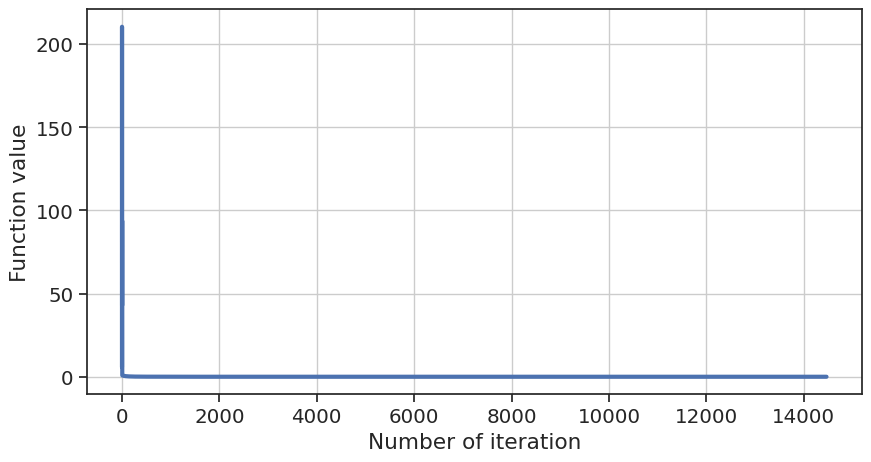

In [237]:
draw_convergence_plot(f_vals, N_iterations)

In [238]:
alpha

0.015

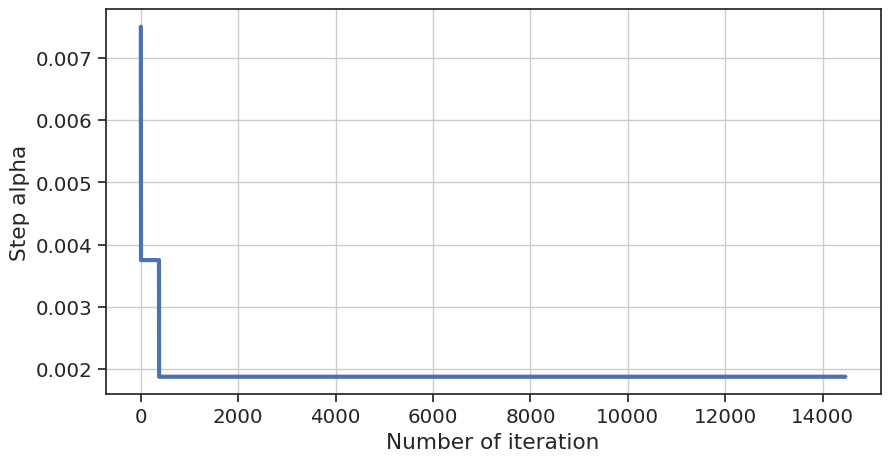

In [239]:
draw_alpha_plot(alphas, N_iterations)

Постройте график зависимости длины шага от итерации для каждой начальной точки. Какой вывод Вы
можете сделать?


**Вывод:** (доделать)

если в правиле Армихо использовать `if`, то метод расходится (было выше)

если использовать `while`, то шаг уменьшается до необходимого значения на первых итерациях и дальше не меняется

## Task 4.2: Conjugate gradient method

### Conjugate gradient method

In [23]:
def f(x, A, b):
    """
    Quadratic function f(x)
    """
    func = (1/2) * (x.T @ A @ x) + (b.T @ x)
    return func
    
def grad_f(x, A, b):
    """
    Gradient of quadratic function f(x)
    """
    grad = (A @ x) + b
    return grad

In [24]:
A = np.array([[2, -1, -1],
              [-1, 2, 1],
              [-1, 1, 2]])

x0 = np.array([0, 0, 1])

b = np.array([1, 1, 0])

n = 2

In [31]:
n = 10
cond_num = 10

lambdas = sps.uniform(loc=1, scale=1+cond_num).rvs(size=n)
lambdas[np.argmin(lambdas)] = 1
lambdas[np.argmax(lambdas)] = cond_num

A = np.diagflat(lambdas)
b = np.random.rand(n) * 10
x0 = np.random.rand(n) * 10

# assert is_pos_def(A), "Matrix is not positive definite"

b

array([5.57735542, 3.52523567, 2.4502179 , 7.885956  , 8.2051506 ,
       3.4836156 , 2.24809213, 5.69887048, 7.76902996, 0.01663931])

In [25]:
def conjugate_gradient_method(x0, A, b, verbose=False):
    """
    Conjugate gradient method for quadratic functions 
        f(x) = (1/2) * (x.T * A * x) + (b.T * x) + c
    Number of method iterations is equal to dimension of x
    
    :param A: constant matrix from function f(x)
    :param b: constant vector from function f(x)
    :param x0: initial guess of x
    :return: f_min, x_min
    """
    if verbose:
        logger.setLevel("DEBUG")
    else:
        logger.setLevel("INFO")
        
    h_k = grad_f(x0, A, b)
    h_k1 = grad_f(x0, A, b)
    x_k = x0
    x_k1 = x0
    n = len(b)
    n_steps = n

    for k in range(n_steps):
        logger.debug(f'Step: k = {k}')
        
        x_k = x_k1
        h_k = h_k1
        
        # compute alpha
        alpha_k = - (grad_f(x_k, A, b) @ h_k) / (h_k @ A @ h_k)
        logger.debug(f'Alpha_k = {alpha_k}')

        # perform step
        x_k1 = x_k + alpha_k * h_k
        logger.debug(f'X_k = {x_k}')
        logger.debug(f'X_k+1 = {x_k1}')

        # compute beta
        beta = (grad_f(x_k1, A, b) @ A @ h_k) / (h_k @ A @ h_k)
        logger.debug(f'Beta_k = {beta}')

        # find next conjugated vector
        h_k1 = grad_f(x_k1, A, b) - (beta * h_k)
        logger.debug(f'h_k = {h_k}')
        logger.debug(f'h_k+1 = {h_k1} \n')
        
        # check that h_k and h_k+1 are A-conjugated
        assert np.isclose(h_k1 @ (A @ h_k), 0, rtol=0, atol=1e-10), f"h_k and h_k+1 are not A-conjugated, {h_next @ A @ h_prev}"

        if k == n_steps - 1:
            x_min = x_k1
            f_min = f(x_min, A, b)
            logger.info('Optimization terminated successfully')
            logger.info(f'min f(x) = {f_min}, x_min = {x_min}')
    
    return f_min, x_min

In [26]:
f_min, x_min = conjugate_gradient_method(x0, A, b, verbose=True)

DEBUG: Step: k = 0
DEBUG: Alpha_k = -0.3333333333333333
DEBUG: X_k = [0 0 1]
DEBUG: X_k+1 = [ 0.         -0.66666667  0.33333333]
DEBUG: Beta_k = -0.22222222222222218
DEBUG: h_k = [0 2 2]
DEBUG: h_k+1 = [1.33333333 0.44444444 0.44444444] 

DEBUG: Step: k = 1
DEBUG: Alpha_k = -0.7500000000000001
DEBUG: X_k = [ 0.         -0.66666667  0.33333333]
DEBUG: X_k+1 = [-1.00000000e+00 -1.00000000e+00 -5.55111512e-17]
DEBUG: Beta_k = -5.200010849845538e-33
DEBUG: h_k = [1.33333333 0.44444444 0.44444444]
DEBUG: h_k+1 = [ 6.93334780e-33  2.31111593e-33 -1.11022302e-16] 

DEBUG: Step: k = 2
DEBUG: Alpha_k = -0.5
DEBUG: X_k = [-1.00000000e+00 -1.00000000e+00 -5.55111512e-17]
DEBUG: X_k+1 = [-1. -1.  0.]
DEBUG: Beta_k = 0.0
DEBUG: h_k = [ 6.93334780e-33  2.31111593e-33 -1.11022302e-16]
DEBUG: h_k+1 = [0. 0. 0.] 

INFO: Optimization terminated successfully
INFO: min f(x) = -1.0, x_min = [-1. -1.  0.]


In [27]:
scipy.optimize.minimize(f, x0=x0, args=(A, b), method='CG')

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -0.9999999999999996
       x: [-1.000e+00 -1.000e+00 -7.506e-09]
     nit: 4
     jac: [ 0.000e+00  0.000e+00  0.000e+00]
    nfev: 32
    njev: 8

## Task 5: Nesterov, Heavy-Ball

In [240]:
def f(x, A, b):
    """
    Quadratic function f(x)
    """
    func = (1/2) * (x.T @ A @ x) + (b.T @ x)
    return func
    
def grad_f(x, A, b):
    """
    Gradient of quadratic function f(x)
    """
    grad = (A @ x) + b
    return grad

### Heavy-Ball method

$$ x_{k+1} = x_k - \alpha  \nabla f (x_k) + \beta (x_k - x_{k-1}) $$

$$ \alpha, ~ \beta - \text{параметры} $$

In [421]:
def heavy_ball_method(x0, A, b, N, alpha, beta, eps, verbose=False):
    """
    """
    if verbose:
        logger.setLevel("DEBUG")
    else:
        logger.setLevel("INFO")
    
    n = len(x0)
    x = np.zeros((N, n))
    f_vals = np.zeros(N)
    x[0] = x0
    x[1] = x0
    f_vals[0] = f(x[0], A, b)

    norm_0 = np.linalg.norm(grad_f(x[0], A, b))
    end_iteration = N

    for k in range(1, N-1):
        
        x[k+1] = x[k] - alpha * grad_f(x[k], A, b) + beta * (x[k] - x[k-1])
        
        norm_k = np.linalg.norm(grad_f(x[k+1], A, b))
        stop_criteria = ((norm_k**2) / (norm_0**2)) <= eps
        
        f_vals[k] = f(x[k], A, b)
        f_vals[k+1] = f(x[k+1], A, b)
        
        if stop_criteria:
            x_min = x[k+1]
            end_iteration = k+1
            logger.info(f'HB converge at {k+1} iteration, min f(x) = {f_vals[k+1]}')
            logger.debug(f'x_min = {x_min}')
            break
        
    if not stop_criteria:
            x_min = None
            logger.info(f'(!) HB didnt converge, may be need to increase number of iterations N')
            logger.debug(f'last f(x) = {f_vals[k+1]} at x = {x[k+1]}')
            logger.debug(f"current epsilon = {(norm_k**2 / norm_0**2)}")
            
    return f_vals, x_min, end_iteration

#### Сравнение с градиентным спуском

In [518]:
# n = 10
# cond_num = 1000
n = 2
cond_num = 10


lambdas = sps.uniform(loc=1, scale=1+cond_num).rvs(size=n)
lambdas[np.argmin(lambdas)] = 1
lambdas[np.argmax(lambdas)] = cond_num

A = np.diagflat(lambdas)
b = sps.uniform(loc=1, scale=100).rvs(n)
# A, b

In [519]:
N = int(1e4)
alpha = 0.001
beta = 0.3
eps = 1e-8

x0 = sps.uniform(loc=1, scale=100).rvs(n)
x0

array([59.62452935, 70.80898098])

Сравнение

In [520]:
f_vals_HB, x_min, N_iter_HB = heavy_ball_method(x0, A, b, N, alpha, beta, eps)

INFO: HB converge at 4732 iteration, min f(x) = -316.0034739842719


In [521]:
f_vals_GD, x, N_iter_GD, alphas = gradient_descent(n, N, alpha, eps, A, b, x0)

INFO: GD converge at 6764 iteration, min f(x) = -316.0034767022351


In [522]:
scipy.optimize.minimize(f, x0, args=(A, b))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -316.00655857345504
        x: [-8.603e+00 -7.470e+00]
      nit: 5
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 1.001e+00 -2.722e-05]
            [-2.722e-05  9.999e-02]]
     nfev: 24
     njev: 8

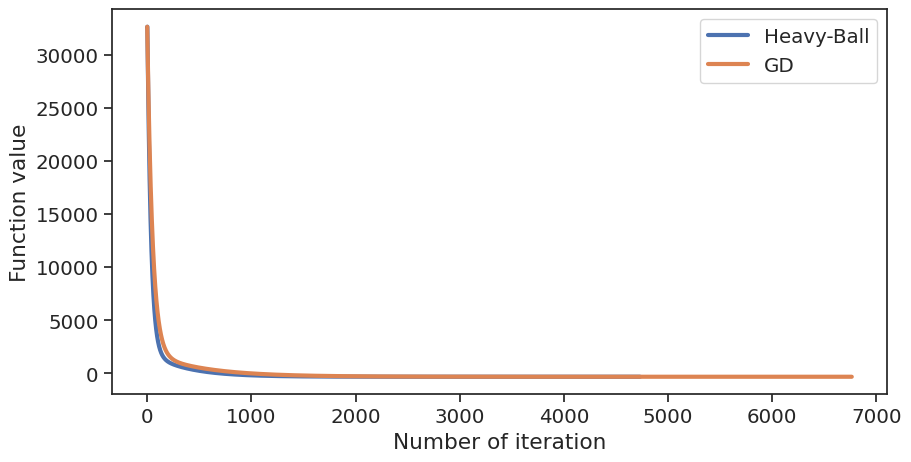

In [523]:
draw_convergence_plot(f_vals_HB, N_iter_HB, label='Heavy-Ball')
draw_convergence_plot(f_vals_GD, N_iter_GD, label='GD')

В лог шкале

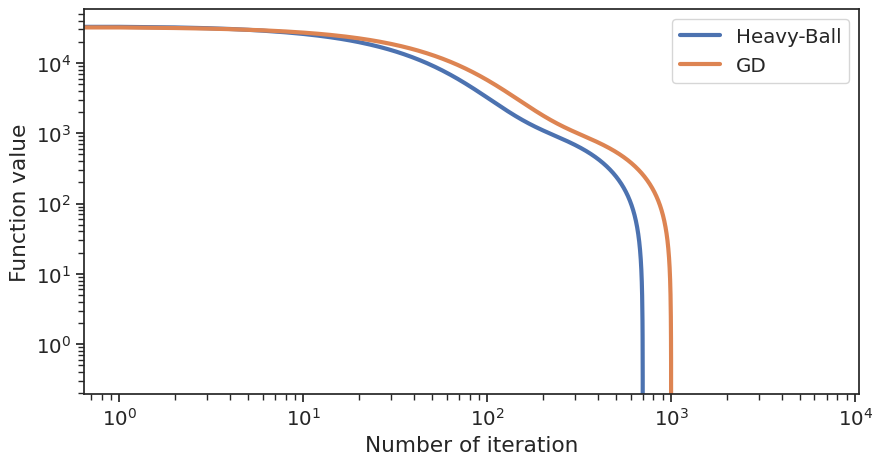

In [524]:
draw_convergence_plot(f_vals_HB, N_iter_HB, label='Heavy-Ball')
draw_convergence_plot(f_vals_GD, N_iter_GD, label='GD')

plt.yscale('log')
plt.xscale('log')

Оба метода сходятся примерно за одинаковое количество итераций, при этом Heavy-Ball может вести себя немонотонно

### Nesterov momentum


$$ x_{k+1} = x_k + \beta_k (x_k - x_{k-1}) - \alpha_k \nabla f (x_k + \beta_k (x_k - x_{k-1})) $$

$$ \alpha_k, ~ \beta_k - \text{параметры} $$

In [540]:
def Nesterov_momentum(x0, A, b, N, eps, verbose=False, y0=None):
    """ 
    """
    if verbose:
        logger.setLevel("DEBUG")
    else:
        logger.setLevel("INFO")
    
    eigen_vals = np.linalg.eigvals(A)
    mu = np.min(eigen_vals)
    L = np.max(eigen_vals)
    
    n = len(x0)
    x = np.zeros((N, n))
    y = np.zeros((N, n))
    x[0] = x0
    if y0 is None:
        y[0] = x0

    f_vals = np.zeros(N)
    f_vals[0] = f(x[0], A, b)

    norm_0 = np.linalg.norm(grad_f(x[0], A, b))
    end_iteration = N

    for k in range(N-1):
        # compute params
        alpha_k = 1 / L
        beta_k = (np.sqrt(L) - np.sqrt(mu)) / (np.sqrt(L) + np.sqrt(mu))
        # beta_k = k / (k + 3)
        
        # method step
        x[k+1] = y[k] - alpha_k * grad_f(y[k], A, b)
        y[k+1] = x[k+1] + beta_k * (x[k+1] - x[k])
        
        norm_k = np.linalg.norm(grad_f(x[k+1], A, b))
        stop_criteria = ((norm_k**2) / (norm_0**2)) <= eps
        
        f_vals[k] = f(x[k], A, b)
        f_vals[k+1] = f(x[k+1], A, b)
        
        if stop_criteria:
            x_min = x[k+1]
            end_iteration = k+1
            logger.info(f'Nesterov converge at {k+1} iteration, min f(x) = {f_vals[k+1]}')
            logger.debug(f'x_min = {x_min}')
            break
        
    if not stop_criteria:
            x_min = None
            logger.info(f'(!) Nesterov didnt converge, may be need to increase number of iterations N')
            logger.debug(f'last f(x) = {f_vals[k+1]} at x = {x[k+1]}')
            logger.debug(f"current epsilon = {(norm_k**2 / norm_0**2)}")
    
    return f_vals, x_min, end_iteration

#### Сравнение с градиентным спуском

In [526]:
n = 2
cond_num = 10

lambdas = sps.uniform(loc=1, scale=1+cond_num).rvs(size=n)
lambdas[np.argmin(lambdas)] = 1
lambdas[np.argmax(lambdas)] = cond_num

A = np.diagflat(lambdas)
b = sps.uniform(loc=1, scale=100).rvs(n)
A, b

(array([[ 1.,  0.],
        [ 0., 10.]]),
 array([38.02169692, 73.57637447]))

In [527]:
N = int(1e4)
alpha = 0.1
beta = 0.8
eps = 1e-8

x0 = sps.uniform(loc=1, scale=100).rvs(n)
x0

array([41.53969641, 61.10810899])

Сравнение

In [528]:
f_vals_Nest, x_min, N_iter_Nest = Nesterov_momentum(x0, A, b, N, eps)

INFO: Nesterov converge at 25 iteration, min f(x) = -993.4974651202012


In [529]:
f_vals_GD, x, N_iter_GD, alphas = gradient_descent(n, N, alpha, eps, A, b, x0, verbose=True)

INFO: GD converge at 67 iteration, min f(x) = -993.4965242572284
DEBUG: x_min = [-37.95331355  -7.35763745]


In [530]:
scipy.optimize.minimize(f, x0, args=(A, b))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -993.4988624000133
        x: [-3.802e+01 -7.358e+00]
      nit: 5
      jac: [ 0.000e+00  7.629e-06]
 hess_inv: [[ 1.000e+00 -4.059e-05]
            [-4.059e-05  1.000e-01]]
     nfev: 24
     njev: 8

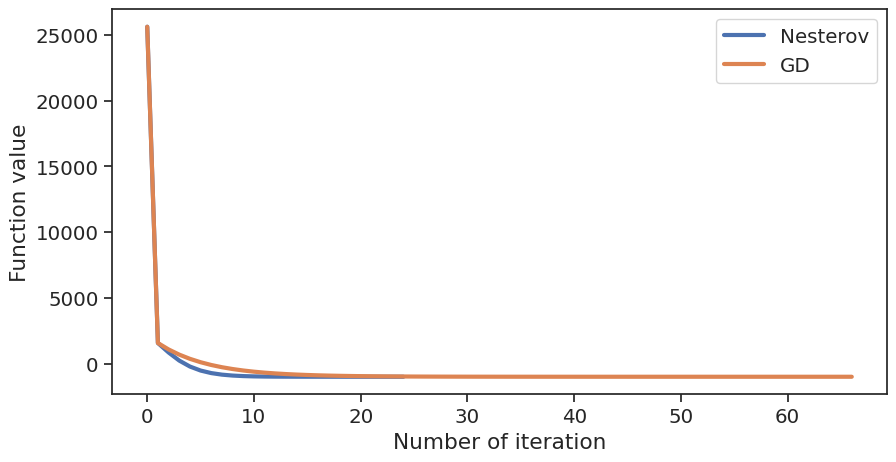

In [531]:
draw_convergence_plot(f_vals_Nest, N_iter_Nest, label='Nesterov')
draw_convergence_plot(f_vals_GD, N_iter_GD, label='GD')

В лог шкале

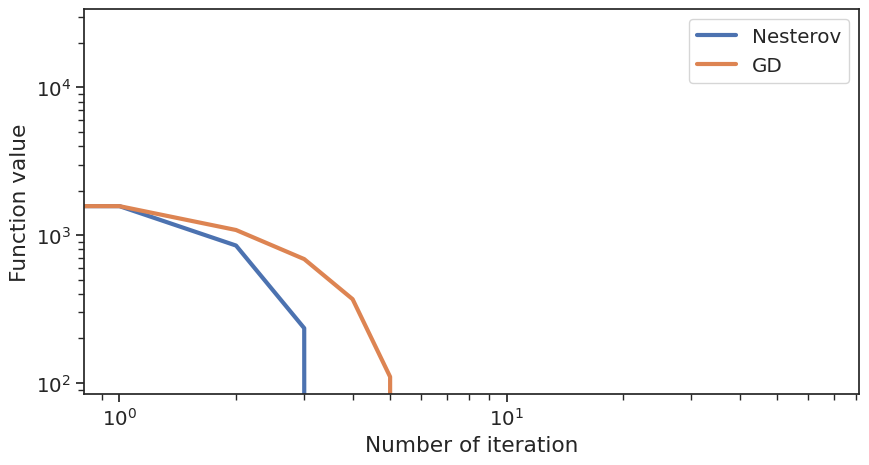

In [532]:
draw_convergence_plot(f_vals_Nest, N_iter_Nest, label='Nesterov')
draw_convergence_plot(f_vals_GD, N_iter_GD, label='GD')

plt.yscale('log')
plt.xscale('log')

Метод Нестерова сходится в среднем в 2 раза быстрее чем градиентный спуск

### Три квадратичные функции ($n$ = 2, 10, 1000) с разными числами обусловленности ($\kappa$ = 1, 100, 10000)

Начальная точка 1, точность $eps = 10^{-8}$

In [534]:
x0 = sps.uniform(loc=1, scale=1000).rvs(2, random_state=42)
x0

array([375.54011885, 951.71430641])

INFO: n = 2, condition number = 1
INFO: Nesterov converge at 1 iteration, min f(x) = -197860.04998144507
INFO: HB converge at 6441 iteration, min f(x) = -197860.03662776708


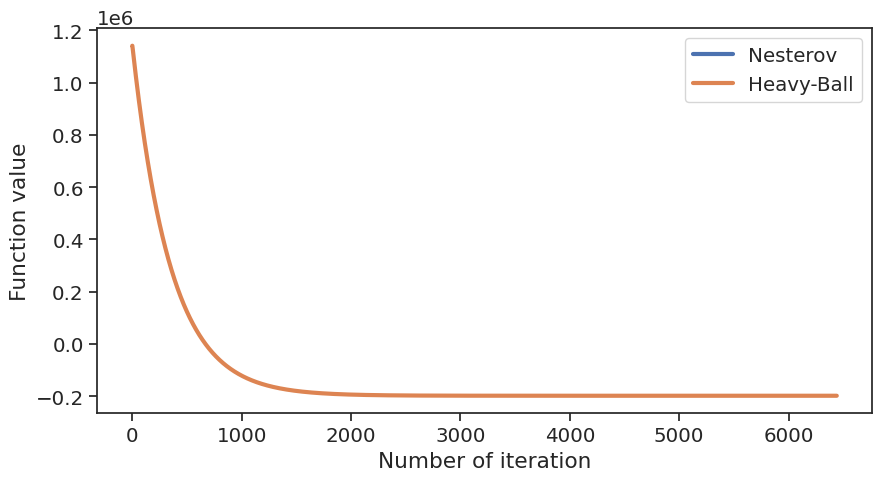

INFO: n = 2, condition number = 100
INFO: Nesterov converge at 67 iteration, min f(x) = -498013.9055151517
INFO: HB converge at 3477 iteration, min f(x) = -498009.9028822369


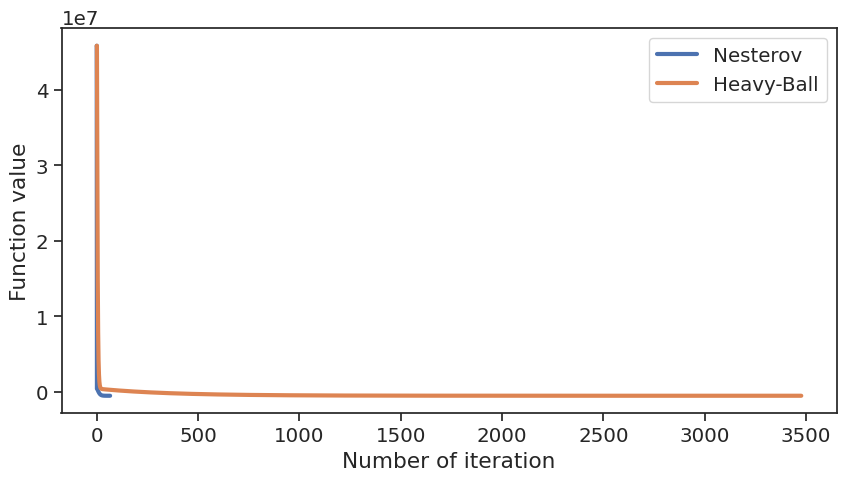

INFO: n = 2, condition number = 1000
INFO: Nesterov converge at 110 iteration, min f(x) = -54851.22520520973
INFO: HB converge at 1416 iteration, min f(x) = -54744.79622883124


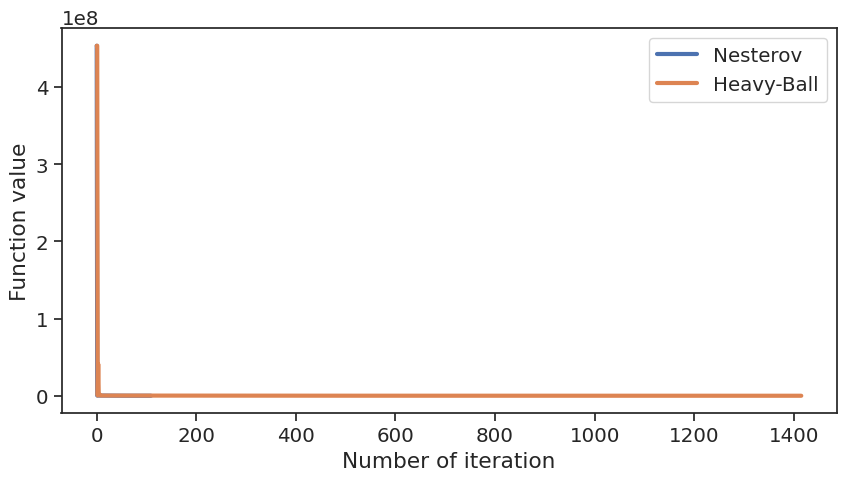

INFO: n = 10, condition number = 1
INFO: Nesterov converge at 11 iteration, min f(x) = -774302.733353864
INFO: HB converge at 5699 iteration, min f(x) = -774302.6933666078


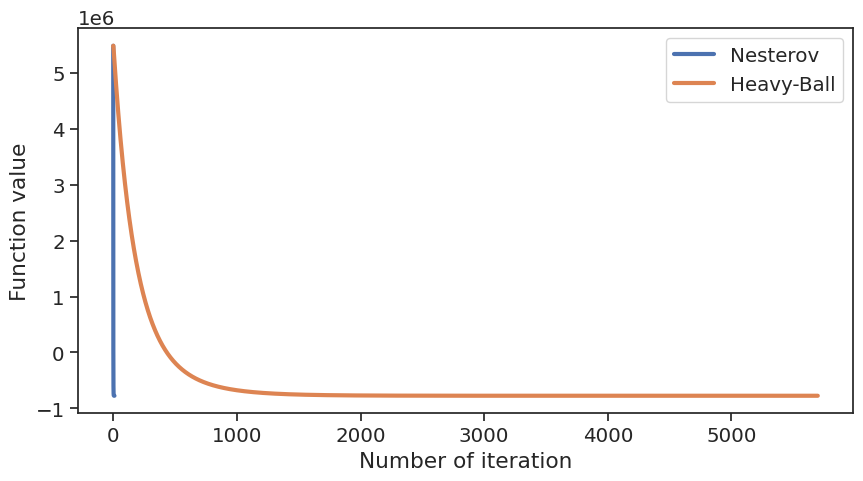

INFO: n = 10, condition number = 100
INFO: Nesterov converge at 58 iteration, min f(x) = -291032.95654739044
INFO: HB converge at 2890 iteration, min f(x) = -291021.0799445834


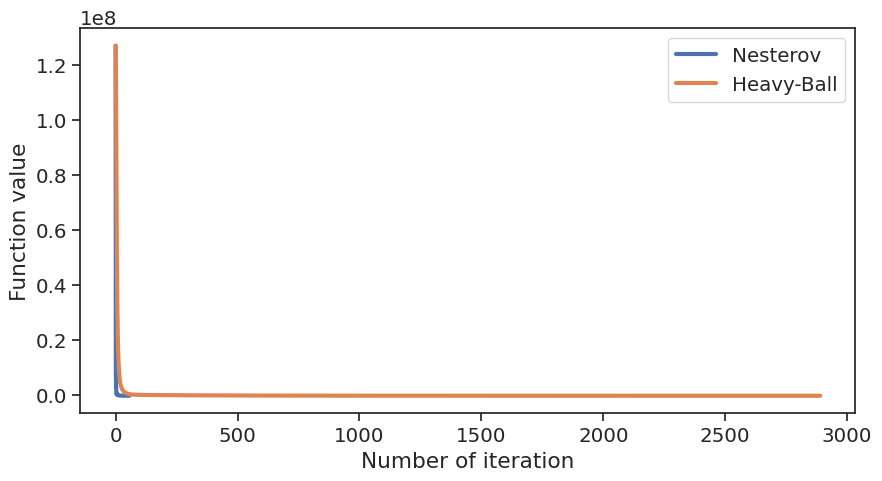

INFO: n = 10, condition number = 1000
INFO: Nesterov converge at 117 iteration, min f(x) = -310567.76281557104
INFO: HB converge at 1548 iteration, min f(x) = -310571.5139044734


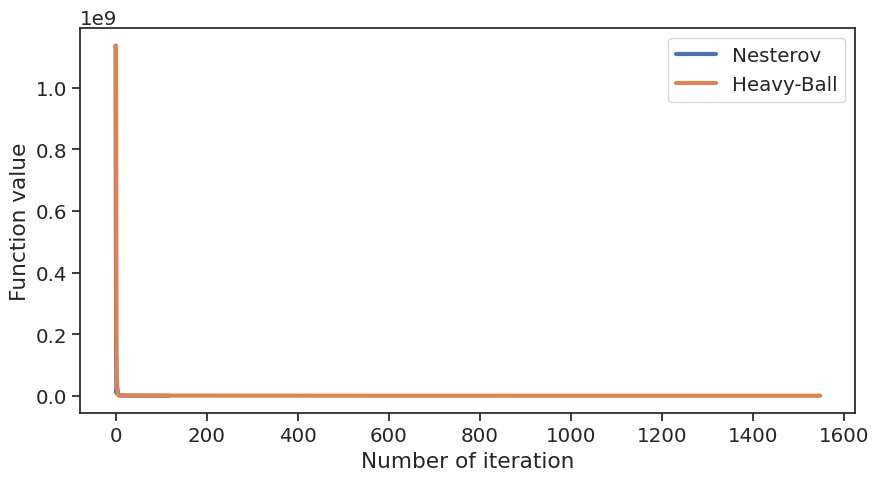

INFO: n = 1000, condition number = 1
INFO: Nesterov converge at 11 iteration, min f(x) = -94397070.06050788
INFO: HB converge at 5087 iteration, min f(x) = -94397061.03856437


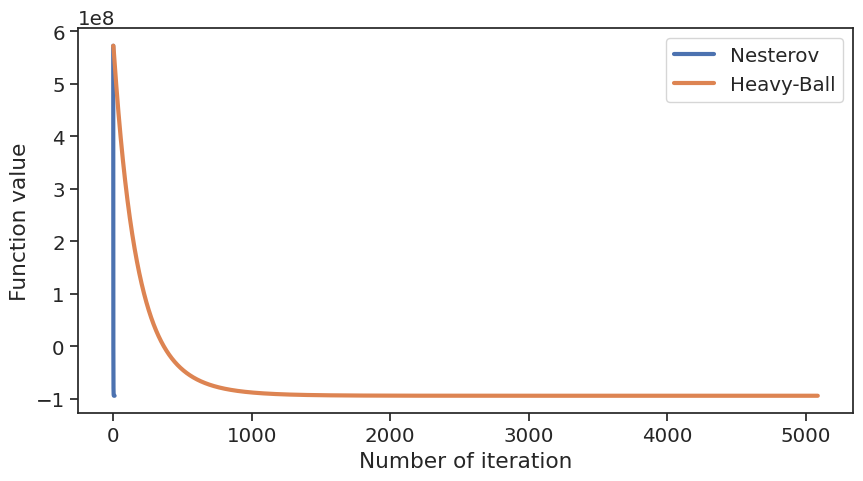

INFO: n = 1000, condition number = 100
INFO: Nesterov converge at 46 iteration, min f(x) = -7753729.562935899
INFO: HB converge at 2012 iteration, min f(x) = -7751624.95502448


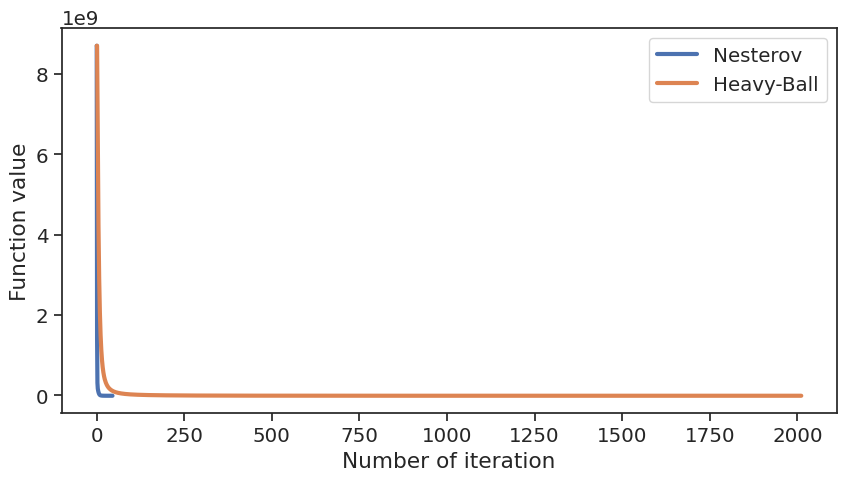

INFO: n = 1000, condition number = 1000
INFO: Nesterov converge at 93 iteration, min f(x) = -903867.3271686627
INFO: HB converge at 265 iteration, min f(x) = -796404.5875373277


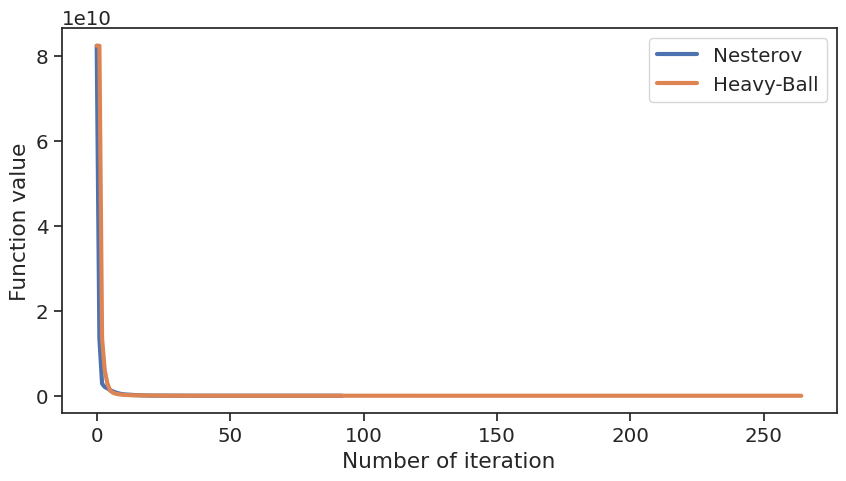

In [536]:
N = int(1e4)
eps = 1e-8

n_list = [2, 10, 1000]
cond_num_list = [1, 100, 1000]

alpha = 0.001
beta = 0.3

for n in n_list:
    for cond_num in cond_num_list:       
        
        logger.info(f"n = {n}, condition number = {cond_num}")
        
        # generate A, b
        lambdas = sps.uniform(loc=1, scale=1+cond_num).rvs(size=n)
        lambdas[np.argmin(lambdas)] = 1; lambdas[np.argmax(lambdas)] = cond_num
        A = np.diagflat(lambdas)
        b = sps.uniform(loc=1, scale=1000).rvs(n)
        
        # initial guess
        x0 = sps.uniform(loc=1, scale=1000).rvs(n, random_state=42)  # начальная точка 1
        
        f_vals_Nest, x_min, N_iter_Nest = Nesterov_momentum(x0, A, b, N, eps)
        f_vals_HB, x_min, N_iter_HB = heavy_ball_method(x0, A, b, N, alpha, beta, eps)
        
        # logger.info(f"scipy ans = {scipy.optimize.minimize(f, x0, args=(A, b))['fun']}")
        
        draw_convergence_plot(f_vals_Nest, N_iter_Nest, label='Nesterov')
        draw_convergence_plot(f_vals_HB, N_iter_HB, label='Heavy-Ball')
        plt.show()

Начальная точка 2, точность $eps = 10^{-8}$

In [466]:
x0 = sps.uniform(loc=1, scale=10).rvs(2, random_state=23)
x0

array([ 6.17297884, 10.46962604])

INFO: n = 2, condition number = 1
INFO: Nesterov converge at 1 iteration, min f(x) = -293260.9577638396
INFO: HB converge at 6441 iteration, min f(x) = -293260.95477172005


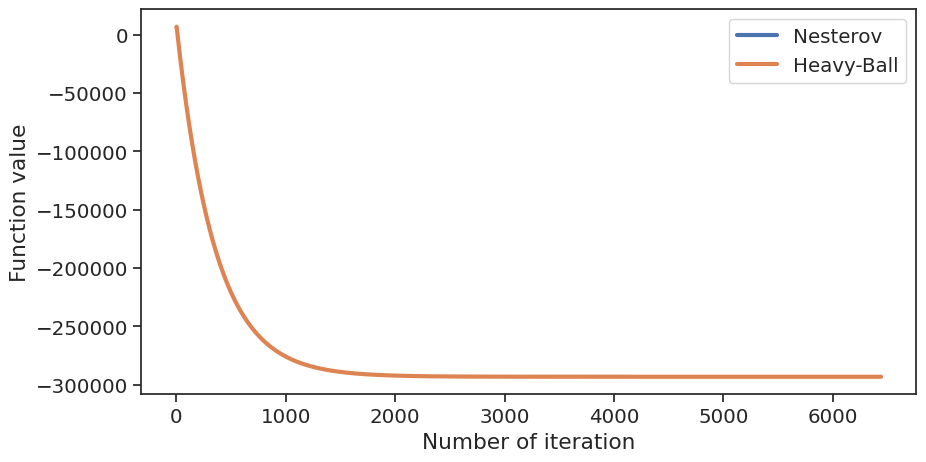

INFO: n = 2, condition number = 100
INFO: Nesterov converge at 97 iteration, min f(x) = -69480.39184821544
INFO: HB converge at 5445 iteration, min f(x) = -69480.39043495215


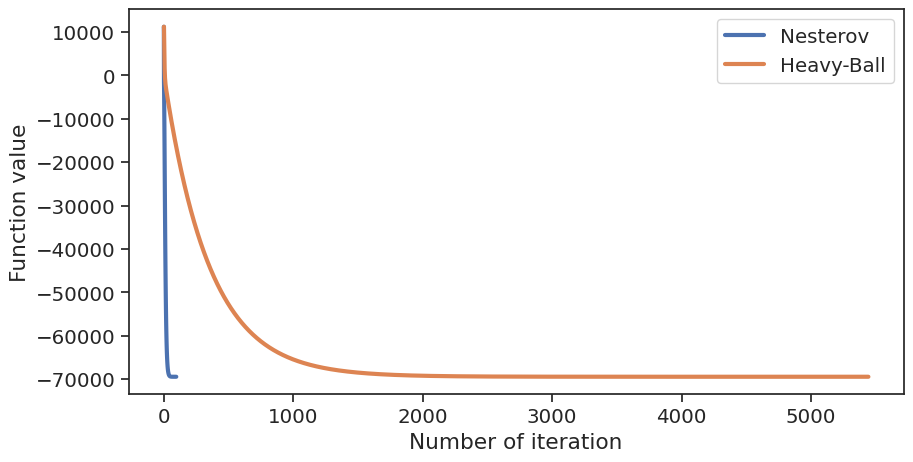

INFO: n = 2, condition number = 1000
INFO: Nesterov converge at 281 iteration, min f(x) = -138234.10779106242
INFO: HB converge at 4708 iteration, min f(x) = -138234.10543635814


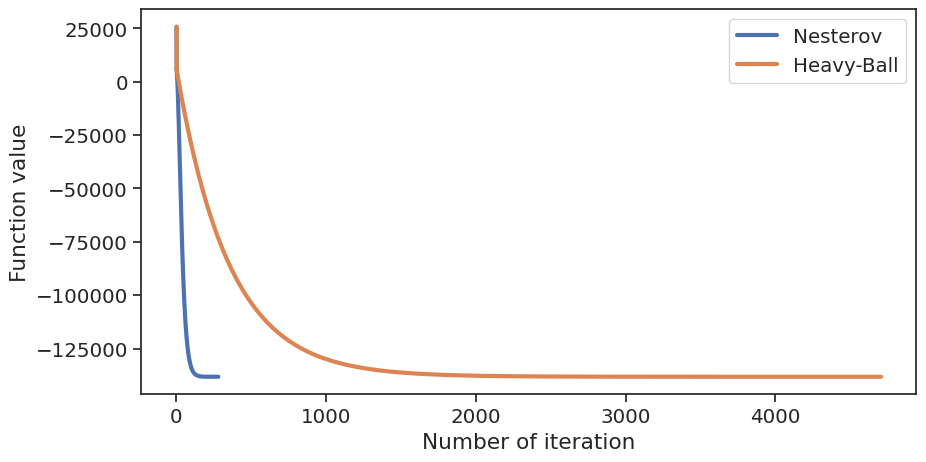

INFO: n = 10, condition number = 1
INFO: Nesterov converge at 11 iteration, min f(x) = -1454669.5886469053
INFO: HB converge at 5562 iteration, min f(x) = -1454669.572310389


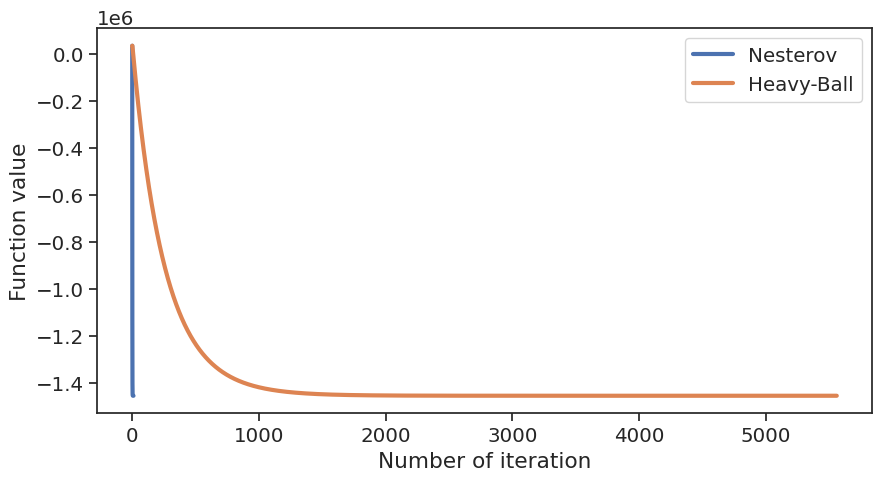

INFO: n = 10, condition number = 100
INFO: Nesterov converge at 98 iteration, min f(x) = -404368.9831839658
INFO: HB converge at 5509 iteration, min f(x) = -404368.97650031326


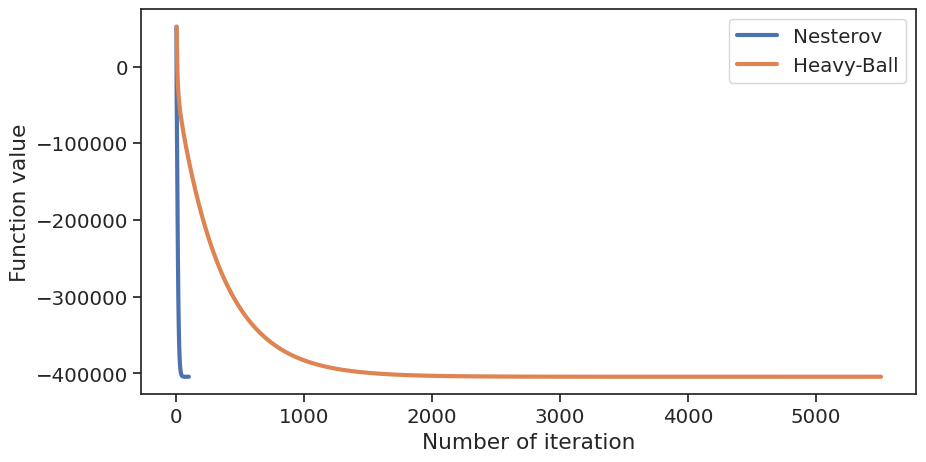

INFO: n = 10, condition number = 1000
INFO: Nesterov converge at 258 iteration, min f(x) = -246344.8040465117
INFO: HB converge at 4233 iteration, min f(x) = -246344.74316715845


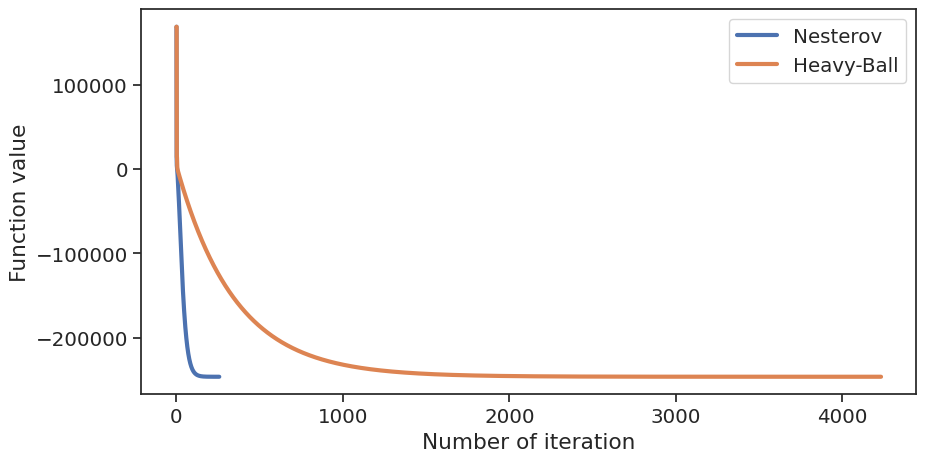

INFO: n = 1000, condition number = 1
INFO: Nesterov converge at 11 iteration, min f(x) = -91219103.20359911
INFO: HB converge at 5238 iteration, min f(x) = -91219102.28280355


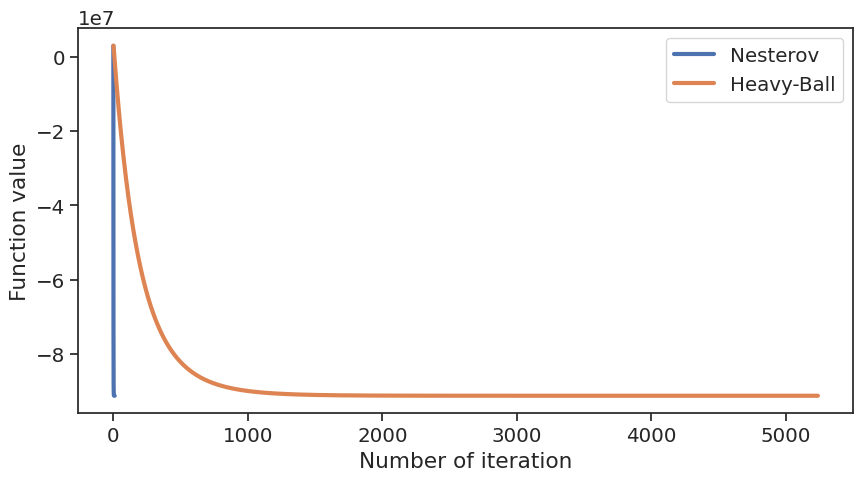

INFO: n = 1000, condition number = 100
INFO: Nesterov converge at 65 iteration, min f(x) = -7010917.421073719
INFO: HB converge at 3209 iteration, min f(x) = -7010916.759544783


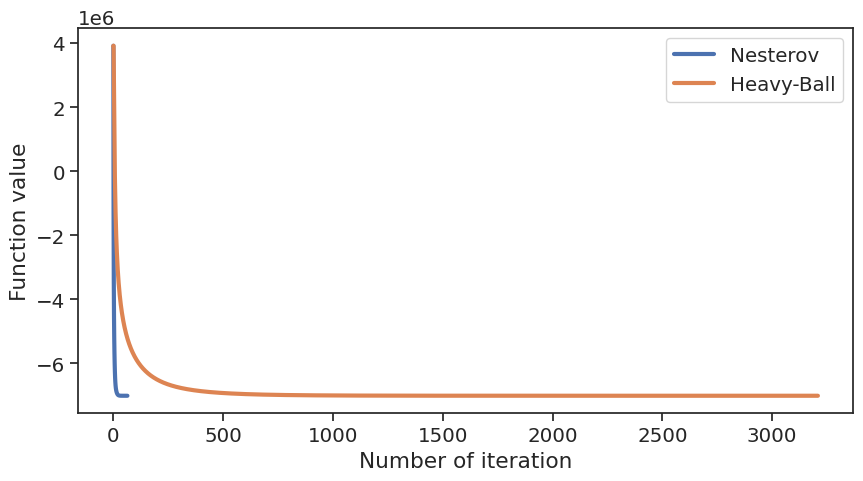

INFO: n = 1000, condition number = 1000
INFO: Nesterov converge at 194 iteration, min f(x) = -1615378.3732329526
INFO: HB converge at 2954 iteration, min f(x) = -1615372.1592975147


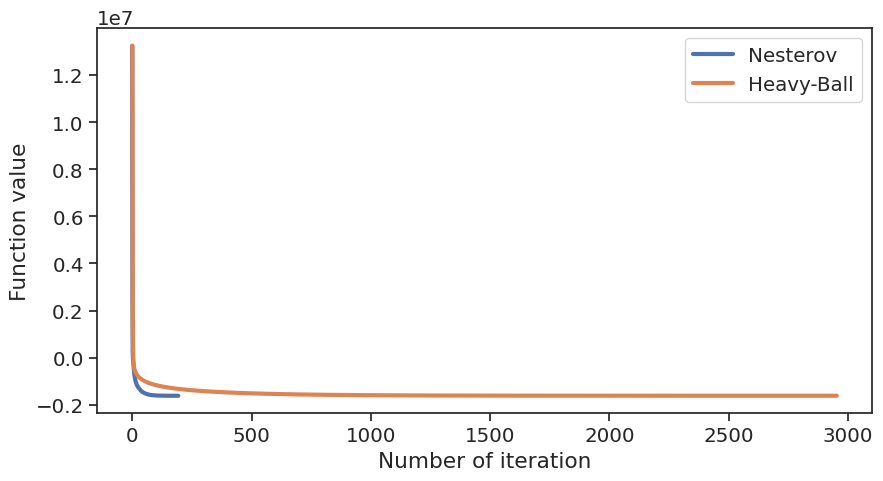

In [467]:
N = int(1e4)
eps = 1e-8

n_list = [2, 10, 1000]
cond_num_list = [1, 100, 1000]

alpha = 0.001
beta = 0.3


for n in n_list:
    for cond_num in cond_num_list:
        
        logger.info(f"n = {n}, condition number = {cond_num}")
        
        # generate A, b
        lambdas = sps.uniform(loc=1, scale=1+cond_num).rvs(size=n)
        lambdas[np.argmin(lambdas)] = 1; lambdas[np.argmax(lambdas)] = cond_num
        A = np.diagflat(lambdas)
        b = sps.uniform(loc=1, scale=1000).rvs(n)
        
        # initial guess
        x0 = sps.uniform(loc=1, scale=10).rvs(n, random_state=23)  # начальная точка 2
        
        f_vals_Nest, x_min, N_iter_Nest = Nesterov_momentum(x0, A, b, N, eps)
        f_vals_HB, x_min, N_iter_HB = heavy_ball_method(x0, A, b, N, alpha, beta, eps)
        
        # logger.info(f"scipy ans = {scipy.optimize.minimize(f, x0, args=(A, b))['fun']}")
        
        draw_convergence_plot(f_vals_Nest, N_iter_Nest, label='Nesterov')
        draw_convergence_plot(f_vals_HB, N_iter_HB, label='Heavy-Ball')
        plt.show()

Точность $eps = 10^{-5}$

INFO: n = 2, condition number = 1
INFO: Nesterov converge at 1 iteration, min f(x) = -467361.553281753
INFO: HB converge at 4026 iteration, min f(x) = -467356.7668682814


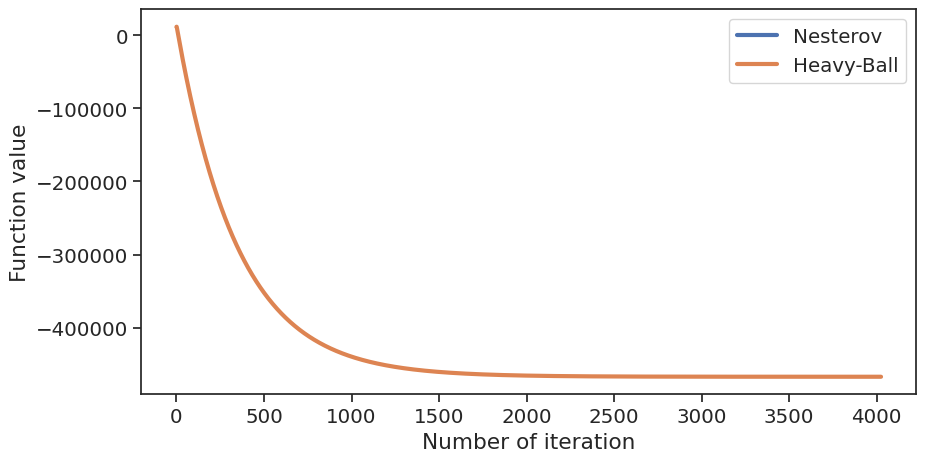

INFO: n = 2, condition number = 100
INFO: Nesterov converge at 67 iteration, min f(x) = -386808.97938014497
INFO: HB converge at 3482 iteration, min f(x) = -386807.59042211244


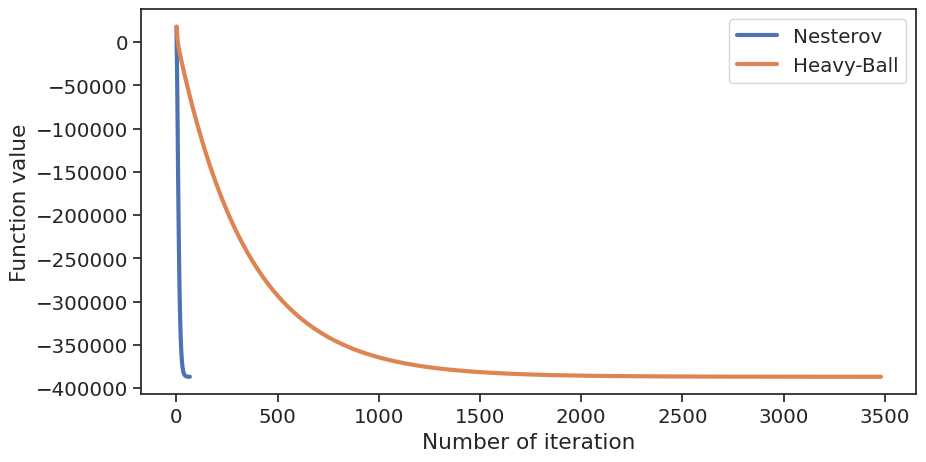

INFO: n = 2, condition number = 1000
INFO: Nesterov converge at 158 iteration, min f(x) = -138371.87562113765
INFO: HB converge at 2281 iteration, min f(x) = -138361.50258876826


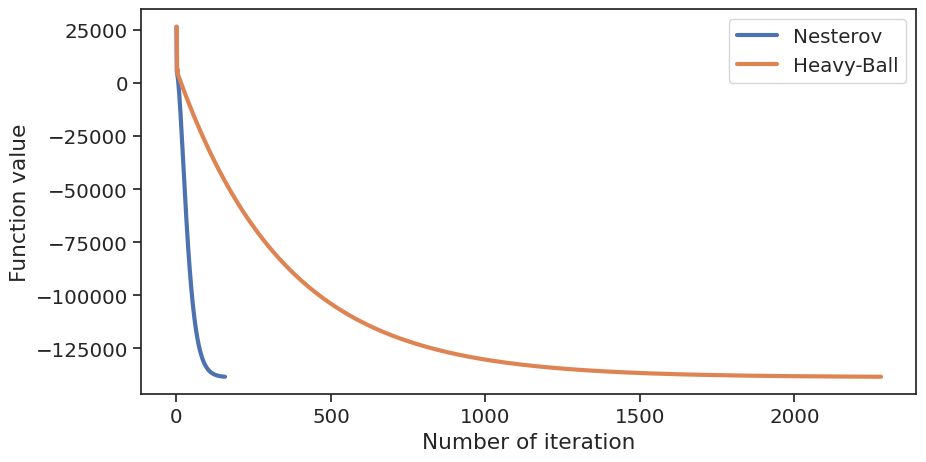

INFO: n = 10, condition number = 1
INFO: Nesterov converge at 7 iteration, min f(x) = -828832.0453766084
INFO: HB converge at 2998 iteration, min f(x) = -828821.8344872728


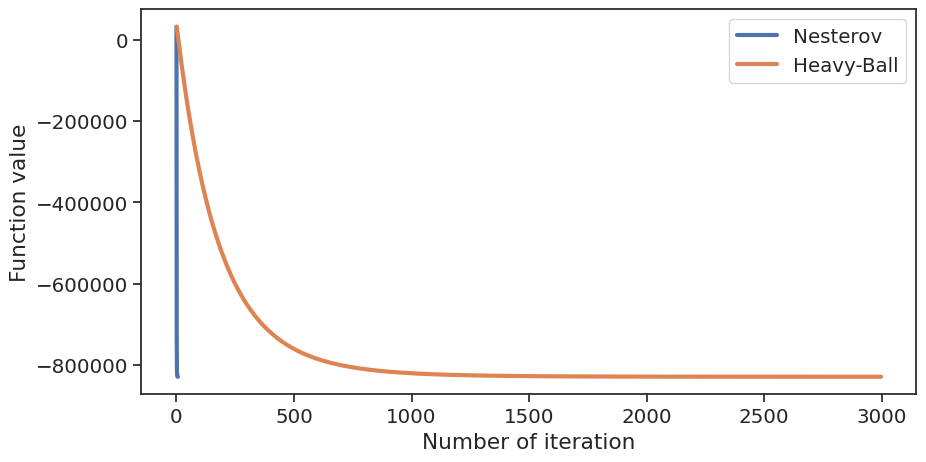

INFO: n = 10, condition number = 100
INFO: Nesterov converge at 61 iteration, min f(x) = -446022.4719061577
INFO: HB converge at 3123 iteration, min f(x) = -446022.3326858675


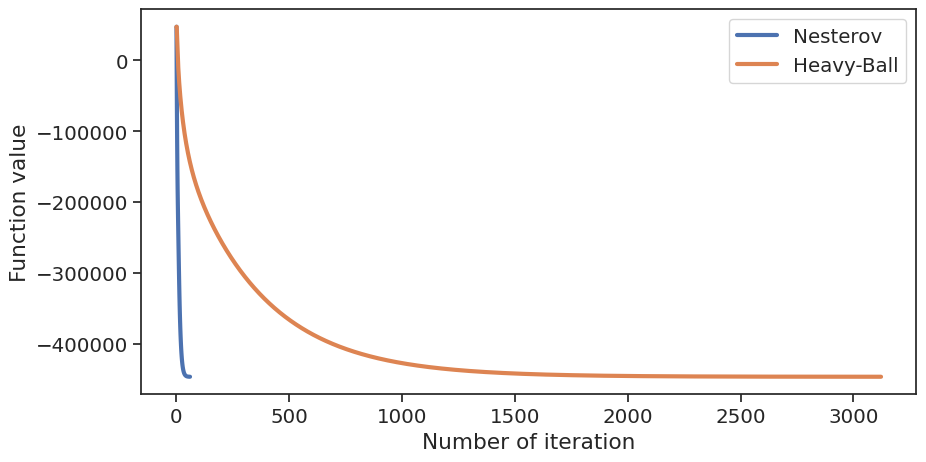

INFO: n = 10, condition number = 1000
INFO: Nesterov converge at 151 iteration, min f(x) = -297105.62295127235
INFO: HB converge at 2167 iteration, min f(x) = -297104.58493466215


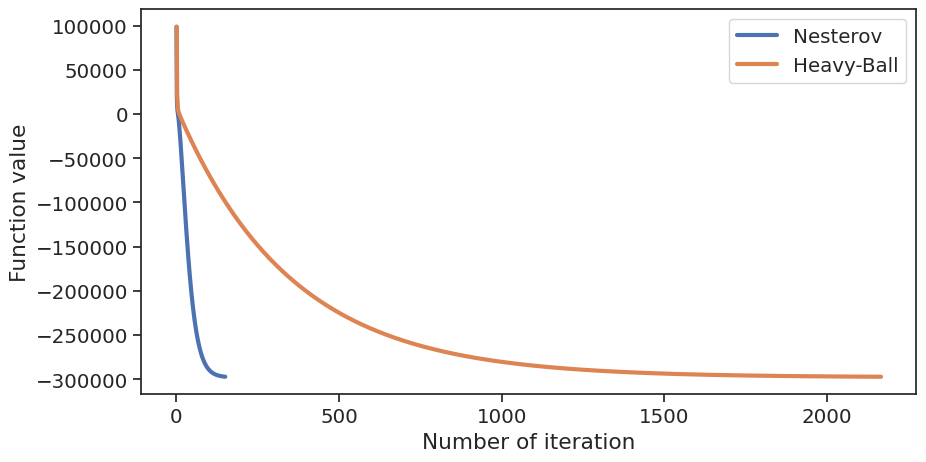

INFO: n = 1000, condition number = 1
INFO: Nesterov converge at 7 iteration, min f(x) = -90804879.54805683
INFO: HB converge at 3091 iteration, min f(x) = -90804196.60794619


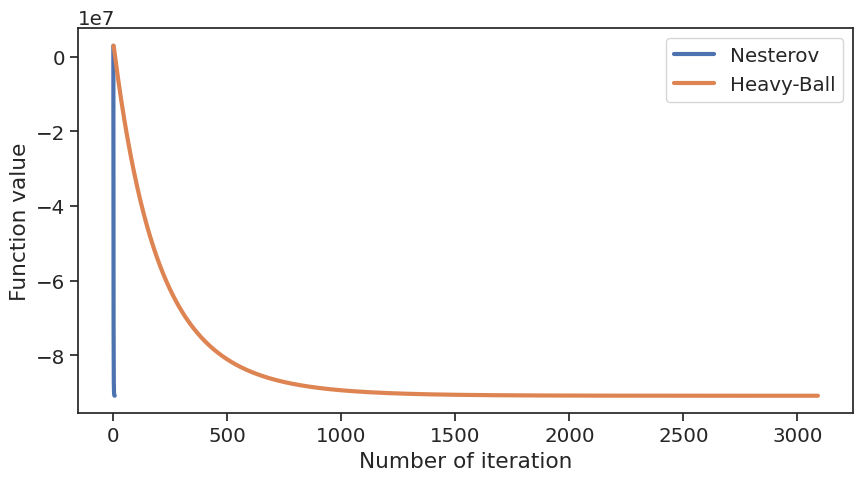

INFO: n = 1000, condition number = 100
INFO: Nesterov converge at 37 iteration, min f(x) = -7321199.8833369315
INFO: HB converge at 1617 iteration, min f(x) = -7320291.117789903


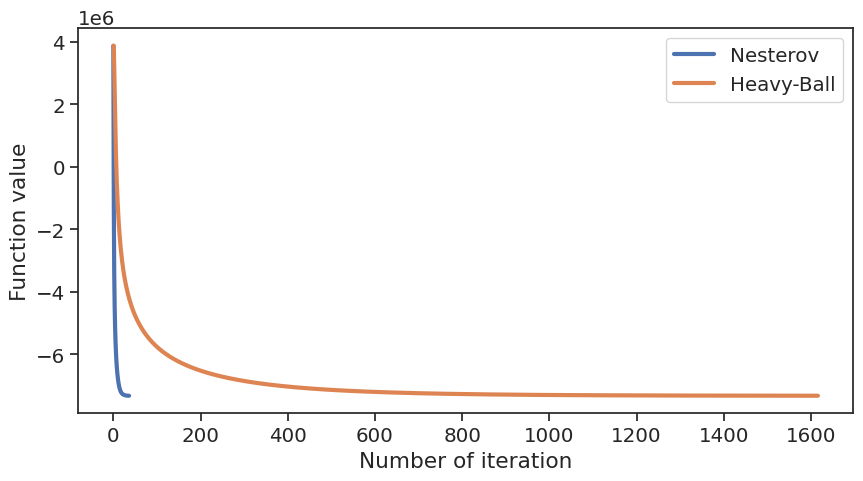

INFO: n = 1000, condition number = 1000
INFO: Nesterov converge at 52 iteration, min f(x) = -895532.8495365066
INFO: HB converge at 147 iteration, min f(x) = -867033.2699360165


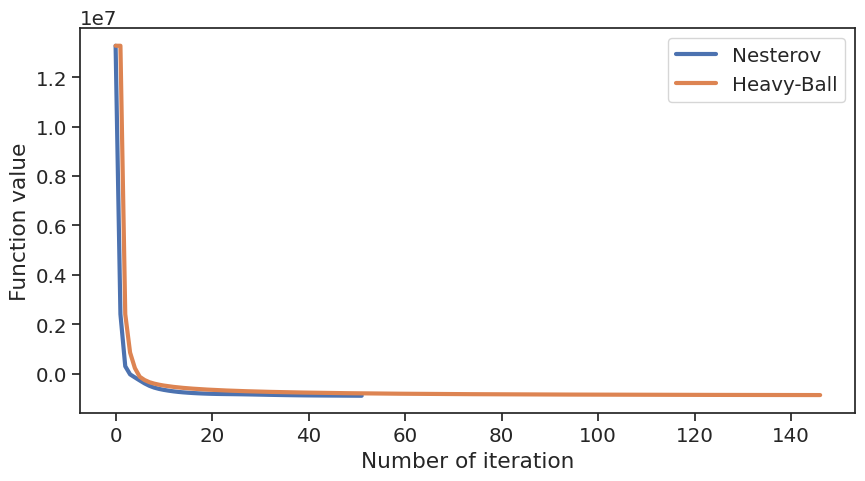

In [468]:
N = int(1e4)
eps = 1e-5

n_list = [2, 10, 1000]
cond_num_list = [1, 100, 1000]

alpha = 0.001
beta = 0.3

for n in n_list:
    for cond_num in cond_num_list:
        
        logger.info(f"n = {n}, condition number = {cond_num}")
        
        # generate A, b
        lambdas = sps.uniform(loc=1, scale=1+cond_num).rvs(size=n)
        lambdas[np.argmin(lambdas)] = 1; lambdas[np.argmax(lambdas)] = cond_num
        A = np.diagflat(lambdas)
        b = sps.uniform(loc=1, scale=1000).rvs(n)
        
        # initial guess
        x0 = sps.uniform(loc=1, scale=10).rvs(n, random_state=23)
        
        f_vals_Nest, x_min, N_iter_Nest = Nesterov_momentum(x0, A, b, N, eps)
        f_vals_HB, x_min, N_iter_HB = heavy_ball_method(x0, A, b, N, alpha, beta, eps)
        
        # logger.info(f"scipy ans = {scipy.optimize.minimize(f, x0, args=(A, b))['fun']}")
        
        draw_convergence_plot(f_vals_Nest, N_iter_Nest, label='Nesterov')
        draw_convergence_plot(f_vals_HB, N_iter_HB, label='Heavy-Ball')
        plt.show()

Точность $eps = 10^{-15}$

INFO: n = 2, condition number = 1
INFO: Nesterov converge at 1 iteration, min f(x) = -366911.0694168216
INFO: (!) HB didnt converge, may be need to increase number of iterations N


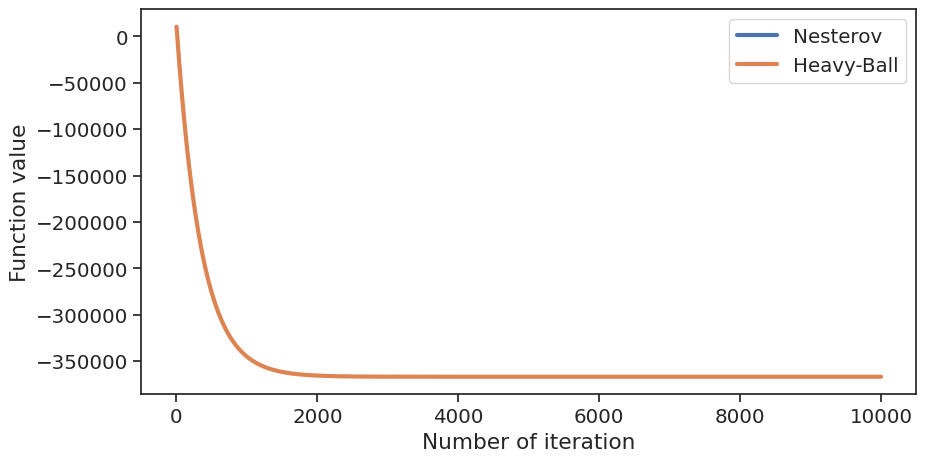

INFO: n = 2, condition number = 100
INFO: Nesterov converge at 179 iteration, min f(x) = -65794.96607530875
INFO: (!) HB didnt converge, may be need to increase number of iterations N


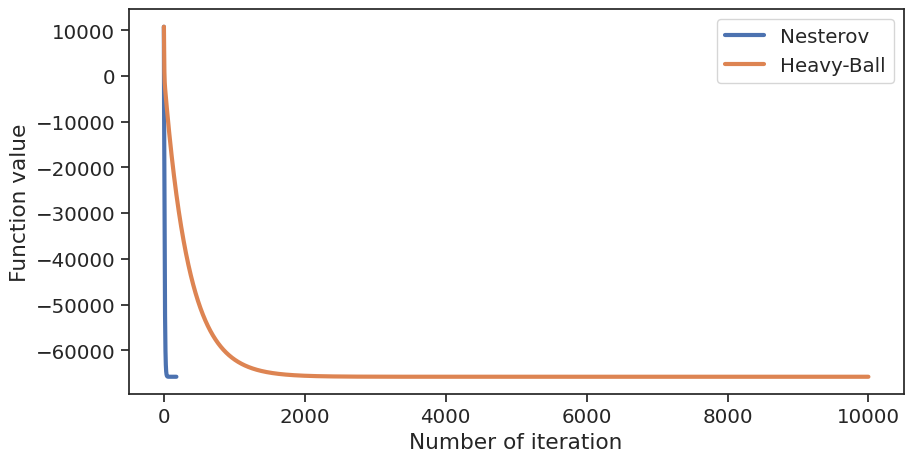

INFO: n = 2, condition number = 1000
INFO: Nesterov converge at 431 iteration, min f(x) = -251.0793719475236
INFO: HB converge at 7788 iteration, min f(x) = -251.07937194427615


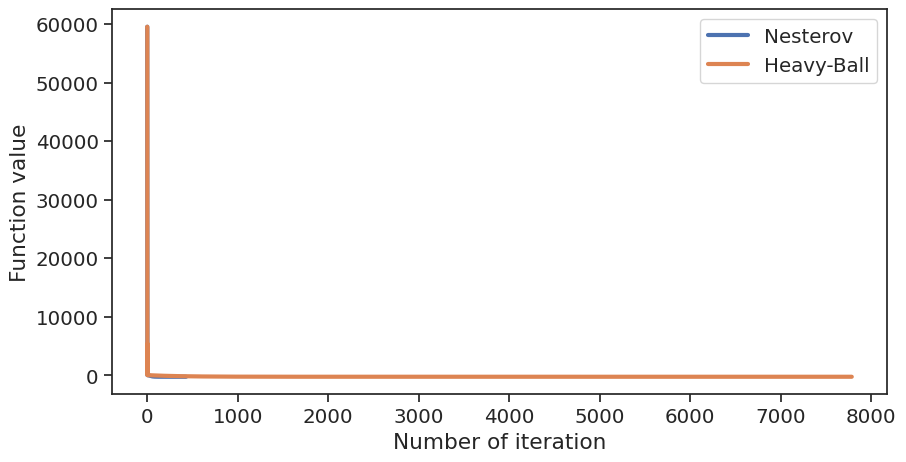

INFO: n = 10, condition number = 1
INFO: Nesterov converge at 22 iteration, min f(x) = -1295991.6180008783
INFO: (!) HB didnt converge, may be need to increase number of iterations N


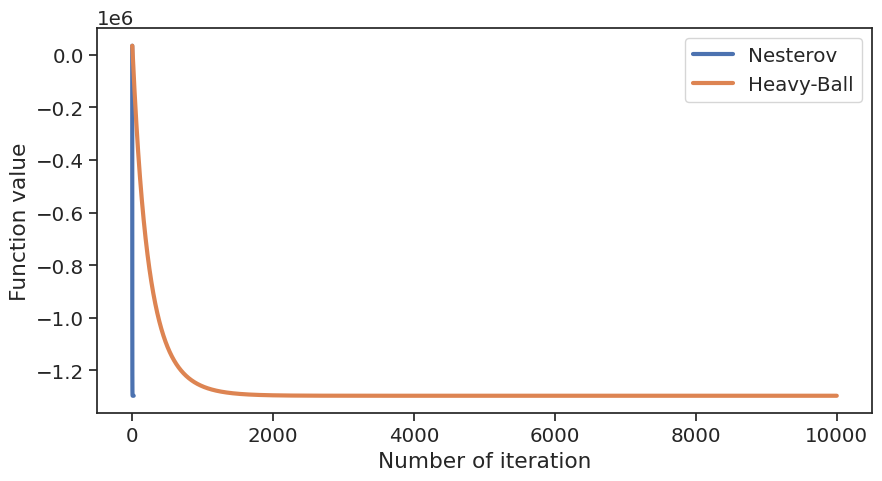

INFO: n = 10, condition number = 100
INFO: Nesterov converge at 153 iteration, min f(x) = -42085.997509980625
INFO: HB converge at 9254 iteration, min f(x) = -42085.9975099801


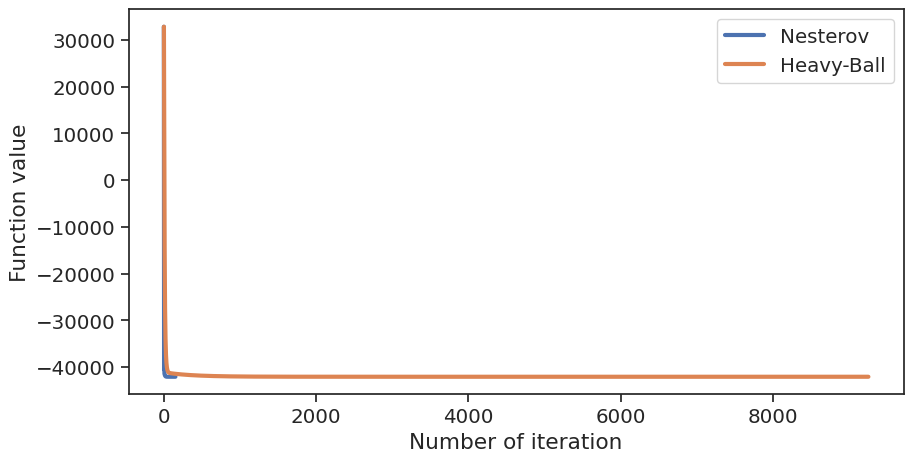

INFO: n = 10, condition number = 1000
INFO: Nesterov converge at 543 iteration, min f(x) = -233648.08120526187
INFO: (!) HB didnt converge, may be need to increase number of iterations N


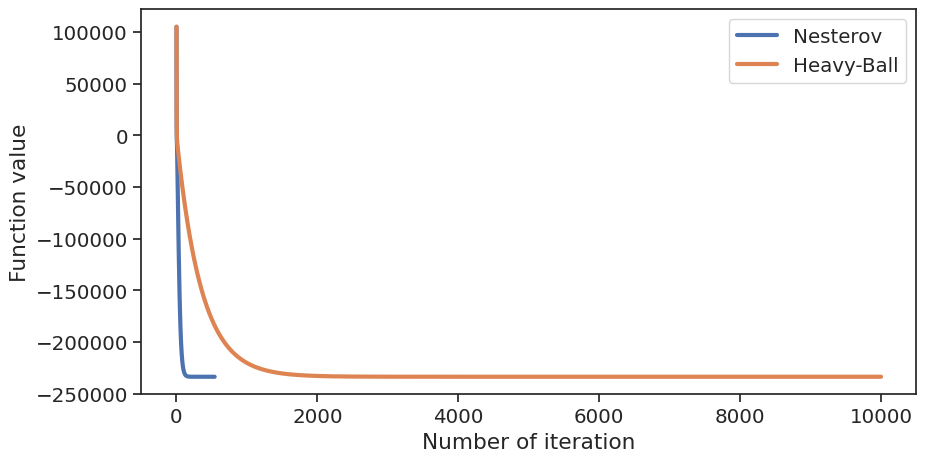

INFO: n = 1000, condition number = 1
INFO: Nesterov converge at 21 iteration, min f(x) = -91485982.56083606
INFO: (!) HB didnt converge, may be need to increase number of iterations N


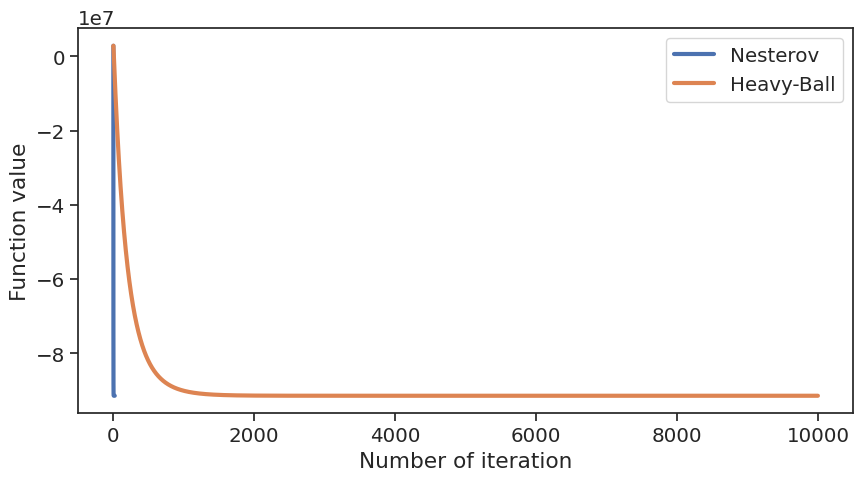

INFO: n = 1000, condition number = 100
INFO: Nesterov converge at 148 iteration, min f(x) = -7695218.246593709
INFO: HB converge at 8788 iteration, min f(x) = -7695218.246593673


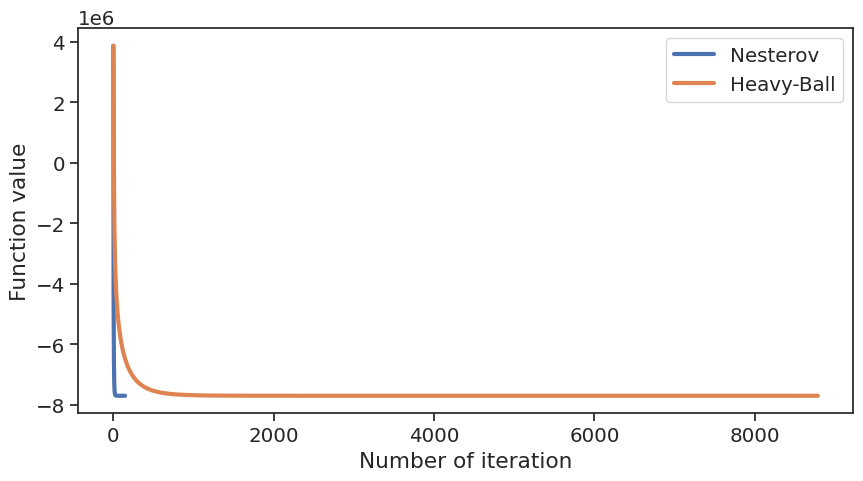

INFO: n = 1000, condition number = 1000
INFO: Nesterov converge at 429 iteration, min f(x) = -1292981.4906147951
INFO: HB converge at 7747 iteration, min f(x) = -1292981.4906144568


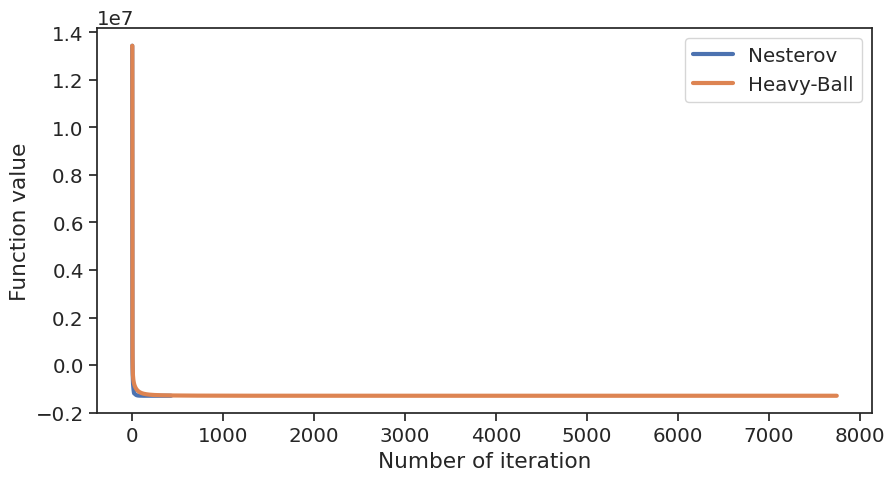

In [469]:
N = int(1e4)
eps = 1e-15

n_list = [2, 10, 1000]
cond_num_list = [1, 100, 1000]

alpha = 0.001
beta = 0.3

for n in n_list:
    for cond_num in cond_num_list:
        
        logger.info(f"n = {n}, condition number = {cond_num}")
        
        # generate A, b
        lambdas = sps.uniform(loc=1, scale=1+cond_num).rvs(size=n)
        lambdas[np.argmin(lambdas)] = 1; lambdas[np.argmax(lambdas)] = cond_num
        A = np.diagflat(lambdas)
        b = sps.uniform(loc=1, scale=1000).rvs(n)
        
        # initial guess
        x0 = sps.uniform(loc=1, scale=10).rvs(n, random_state=23)
        
        f_vals_Nest, x_min, N_iter_Nest = Nesterov_momentum(x0, A, b, N, eps)
        f_vals_HB, x_min, N_iter_HB = heavy_ball_method(x0, A, b, N, alpha, beta, eps)
        
        # logger.info(f"scipy ans = {scipy.optimize.minimize(f, x0, args=(A, b))['fun']}")
        
        draw_convergence_plot(f_vals_Nest, N_iter_Nest, label='Nesterov')
        draw_convergence_plot(f_vals_HB, N_iter_HB, label='Heavy-Ball')
        plt.show()

### Разные начальные условия

In [560]:
n = 10

lambdas = sps.uniform(loc=1, scale=1+cond_num).rvs(size=n)
lambdas[np.argmin(lambdas)] = 1; lambdas[np.argmax(lambdas)] = cond_num
A = np.diagflat(lambdas)
b = sps.uniform(loc=1, scale=2).rvs(n)

$$ x_0 = y_0 = 0_n $$

In [561]:
x0 = np.zeros(n)
y0 = np.zeros(n)

In [562]:
eps = 1e-8

f_vals_Nest, x_min, N_iter_Nest = Nesterov_momentum(x0, A, b, N, eps, y0=y0)

INFO: Nesterov converge at 332 iteration, min f(x) = -3.380549150718206


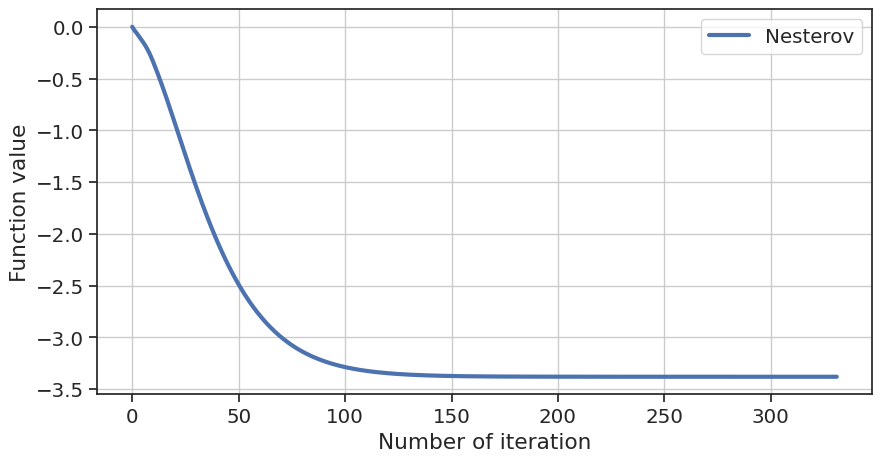

In [563]:
draw_convergence_plot(f_vals_Nest, N_iter_Nest, label='Nesterov')
# draw_convergence_plot(f_vals_GD, N_iter_GD, label='GD')

$$ x_0 = 0_n, ~ y_0 = 1_n $$

In [564]:
x0 = np.zeros(n)
y0 = np.ones(n)

In [565]:
eps = 1e-8

f_vals_Nest, x_min, N_iter_Nest = Nesterov_momentum(x0, A, b, N, eps, y0=y0)

INFO: Nesterov converge at 332 iteration, min f(x) = -3.380549150718206


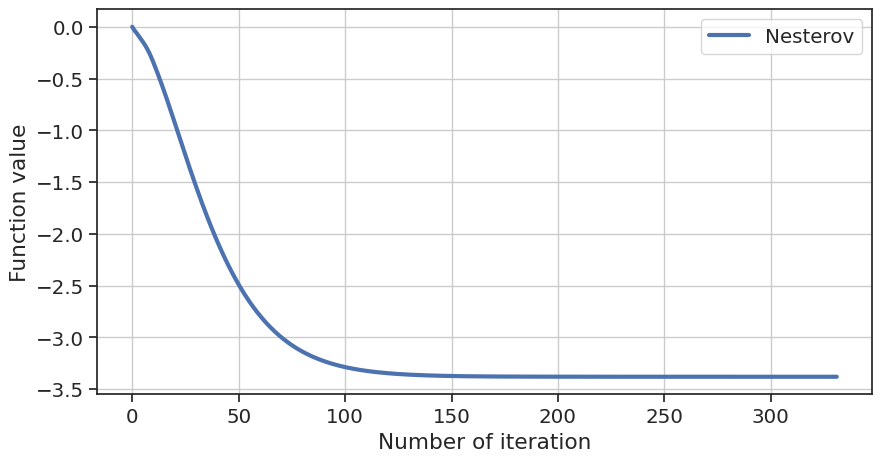

In [566]:
draw_convergence_plot(f_vals_Nest, N_iter_Nest, label='Nesterov')

Метод Нестерова работает одинаково для двух данных начальных условий

### Как зависит поведение методов от числа обусловленности и от начальной точки?



# End